## <font color=blue>Contents<font/>

#########################################################################################################

1. **Jupyter setup <br>**
2. **Data Load <br>**
3. **Define Business Case Question**
4. **Identify Relevant Features to Include**
5. **Exploratory Data Analysis <br>**
    * **Identify Variables and Variable Types and Clean**
    * **Identify and Handle Missing Values**
    * **Inspect Distributions**<br><br>
6. **Regression Model Builds**<br>

#########################################################################################################

## <font color=blue>Jupyter Setup<font/>

###  Import required libraries (for EDA):

In [267]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [268]:
pd.set_option('display.max_columns', 600)

## <font color=blue>Data Load<font/>

### Load Metadata:

In [269]:
# import excel file (contains multiple worksheets)
source_data_excel = pd.ExcelFile('2019 County Health Rankings Data - v2.xls')  

In [270]:
# inspect worksheet names within imported excel file
source_data_excel.sheet_names

['Introduction',
 'Outcomes & Factors Rankings',
 'Outcomes & Factors SubRankings',
 'Ranked Measure Data',
 'Ranked Measure Sources & Years',
 'Additional Measure Data',
 'Addtl Measure Sources & Years']

In [271]:
# the following two worksheets contain metadata on the various features available within the remaining worksheets
# of the excel file

# source_data_excel.parse('Ranked Measure Sources & Years')
# source_data_excel.parse('Addtl Measure Sources & Years')

### Load Data

In [272]:
# alternatively, import the raw data (minus the metadata) from the csv files
source_data_csv = pd.read_csv('analytic_data2019.csv');

/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,24

In [273]:
source_data_csv.shape

(3195, 534)

the data set contains 3,195 rows and 534 features

In [274]:
source_data_csv.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,Premature death CI high,Premature death (Black),Premature death (Hispanic),Premature death (White),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor or fair health CI low,Poor or fair health CI high,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor physical health days CI low,Poor physical health days CI high,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Poor mental health days CI low,Poor mental health days CI high,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight CI low,Low birthweight CI high,Low birthweight (Black),Low birthweight (Hispanic),Low birthweight (White),Adult smoking raw value,Adult smoking numerator,Adult smoking denominator,Adult smoking CI low,Adult smoking CI high,Adult obesity raw value,Adult obesity numerator,Adult obesity denominator,Adult obesity CI low,Adult obesity CI high,Food environment index raw value,Food environment index numerator,Food environment index denominator,Food environment index CI low,Food environment index CI high,Physical inactivity raw value,Physical inactivity numerator,Physical inactivity denominator,Physical inactivity CI low,Physical inactivity CI high,Access to exercise opportunities raw value,Access to exercise opportunities numerator,Access to exercise opportunities denominator,Access to exercise opportunities CI low,Access to exercise opportunities CI high,Excessive drinking raw value,Excessive drinking numerator,Excessive drinking denominator,Excessive drinking CI low,Excessive drinking CI high,Alcohol-impaired driving deaths raw value,Alcohol-impaired driving deaths numerator,Alcohol-impaired driving deaths denominator,Alcohol-impaired driving deaths CI low,Alcohol-impaired driving deaths CI high,Sexually transmitted infections raw value,Sexually transmitted infections numerator,Sexually transmitted infections denominator,Sexually transmitted infections CI low,Sexually transmitted infections CI high,Teen births raw value,Teen births numerator,Teen births denominator,Teen births CI low,Teen births CI high,Teen births (Black),Teen births (Hispanic),Teen births (White),Uninsured raw value,Uninsured numerator,Uninsured denominator,Uninsured CI low,Uninsured CI high,Primary care physicians raw value,Primary care physicians numerator,Primary care physicians denominator,Primary care physicians CI low,Primary care physicians CI high,Ratio of population to primary care physicians.,Dentists raw value,Dentists numerator,Dentists denominator,Dentists CI low,Dentists CI high,Ratio of population to dentists.,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Mental health providers CI low,Mental health providers CI high,Ratio of population to mental health providers.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays CI low,Preventable hospital stays CI high,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Mammography screening raw value,Mammography screening numerator,Mammography screening denominator,Mammography screening CI low,Mammography screening CI high,Mammography screening (Black),Mammography screening (Hispanic),Mammography screening (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations CI low,Flu vaccinations CI high,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,High 

## <font color=blue>Define Business Case Question<font/>

What are the key influencers/symptoms of a 'high debetes' county?

The target variable **`Diabetes prevalence raw value`** is dated **2015** (check metadata file) whereas many of the other features are dated later than 2015.

It is not appropriate to try and predict a variable in the past using variables from the 'future'.

Therefore, we have obtained the most up-to-date 'Diabetes prevalence raw value' (as well as two other variables) from additional sources and will now to import and merge and replacve with the 'older' variables within our original dataset.

In [275]:
diabetes_2016 = pd.read_csv('DiabetesAtlasCountyData.csv')

In [276]:
diabetes_2016.head()

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit
0,Autauga County,Alabama,1001,11.1,7.8,15.5
1,Baldwin County,Alabama,1003,10.7,9,12.6
2,Barbour County,Alabama,1005,17.6,12.3,23.9
3,Bibb County,Alabama,1007,14.5,9.5,21
4,Blount County,Alabama,1009,17,12.7,22.2


In [277]:
# the CountyFIPS variable will be the joining variable with the original dataset but in the original dataset
# it is 5 characters long (leading zeroes):

# We need to add leading zeroes to this variable
diabetes_2016['CountyFIPS'] = diabetes_2016['CountyFIPS'].map(lambda x: str(x).zfill(5))

In [278]:
diabetes_2016.head()

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit
0,Autauga County,Alabama,01001,11.1,7.8,15.5
1,Baldwin County,Alabama,01003,10.7,9,12.6
2,Barbour County,Alabama,01005,17.6,12.3,23.9
3,Bibb County,Alabama,01007,14.5,9.5,21
4,Blount County,Alabama,01009,17,12.7,22.2


In [279]:
diabetes_2016['Percentage'].unique()

array(['11.1', '10.7', '17.6', '14.5', '17', '23.7', '19.2', '17.5',
       '19.9', '15.2', '18.6', '17.4', '22.4', '13.5', '12.5', '16.1',
       '16.2', '25.9', '20.8', '15.3', '18.2', '19.3', '15.8', '15.9',
       '12.8', '18.8', '15.7', '23.3', '14.8', '16.9', '17.8', '16.6',
       '16.5', '12.9', '13.8', '9', '13.9', '23', '20.4', '11.8', '14',
       '18.4', '12.7', '15', '12.3', '19', '10.5', '20.5', '16.3', '11.9',
       '14.2', '19.5', '12.6', '9.8', '7.8', '6.1', '14.9', '4.9', '10.3',
       '6.2', '7.4', '14.4', '6.5', '8.4', '9.2', '8', '4.7', '9.5',
       '8.7', '7.6', '10.8', '8.2', 'No Data', '13.6', '7.9', '11.2',
       '9.1', '16.8', '7.5', '9.9', '11.7', '14.1', '8.9', '15.4', '17.2',
       '8.5', '9.7', '17.1', '18.5', '19.6', '7.7', '19.4', '9.6', '13.1',
       '15.1', '14.6', '23.8', '29', '9.3', '16.4', '15.5', '18', '12.1',
       '17.3', '10.9', '18.7', '14.3', '20.9', '12.4', '18.3', '21.2',
       '13.4', '26.8', '6.9', '6.7', '21', '8.8', '10.2', '10.

In [280]:
diabetes_2016.loc[diabetes_2016['Percentage'] == 'No Data']

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit
88,Prince of Wales - Outer Ketchikan,Alaska,02201,No Data,No Data,No Data
92,Skagway-Hoonah-Angoon,Alaska,02232,No Data,No Data,No Data
95,Wade Hampton Census Area,Alaska,02270,No Data,No Data,No Data
97,Wrangell-Petersburg Census Area,Alaska,02280,No Data,No Data,No Data
2500,Shannon County,South Dakota,46113,No Data,No Data,No Data
2913,Bedford City,Virginia,51515,No Data,No Data,No Data


In [281]:
median_income_2016 = pd.ExcelFile('est16all.xls')

In [282]:
median_income_2016.parse('est16ALL', skiprows= 3).head()

,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound.1,90% CI Upper Bound.1,"Poverty Estimate, Age 0-17",90% CI Lower Bound.2,90% CI Upper Bound.2,"Poverty Percent, Age 0-17",90% CI Lower Bound.3,90% CI Upper Bound.3,"Poverty Estimate, Age 5-17 in Families",90% CI Lower Bound.4,90% CI Upper Bound.4,"Poverty Percent, Age 5-17 in Families",90% CI Lower Bound.5,90% CI Upper Bound.5,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6,"Poverty Estimate, Age 0-4",90% CI Lower Bound.7,90% CI Upper Bound.7,"Poverty Percent, Age 0-4",90% CI Lower Bound.8,90% CI Upper Bound.8
0,0,0,US,United States,44268996,44022086,44515906,14,13.9,14.1,14115713,13976345,14255081,19.5,19.3,19.7,9648486,9548767,9748205,18.3,18.1,18.5,57617,57502,57732,4156949,4108397,4205501,21.3,21.1,21.5
1,1,0,AL,Alabama,814197,796927,831467,17.2,16.8,17.6,267674,258276,277072,24.7,23.8,25.6,185889,177569,194209,23.5,22.4,24.6,46309,45650,46968,78675,74257,83093,27.4,25.9,28.9
2,1,1,AL,Autauga County,7444,6255,8633,13.5,11.3,15.7,2588,2090,3086,19.3,15.6,23,1887,1522,2252,18.4,14.8,22,54487,50886,58088,.,.,.,.,.,.
3,1,3,AL,Baldwin County,24005,20132,27878,11.7,9.8,13.6,7881,6231,9531,17.6,13.9,21.3,5512,4262,6762,16.6,12.8,20.4,56460,53250,59670,.,.,.,.,.,.
4,1,5,AL,Barbour County,6787,5551,8023,29.9,24.5,35.3,2146,1675,2617,39.6,30.9,48.3,1502,1160,1844,36.8,28.4,45.2,32884,29684,36084,.,.,.,.,.,.


In [283]:
median_income_2016_df = median_income_2016.parse('est16ALL', skiprows= 3).loc[:, 
                                                                              ['State FIPS Code', 'County FIPS Code', 
                                                                               'Postal Code', 'Name', 'Median Household Income']]

In [284]:
median_income_2016_df.head()

,State FIPS Code,County FIPS Code,Postal Code,Name,Median Household Income
0,0,0,US,United States,57617
1,1,0,AL,Alabama,46309
2,1,1,AL,Autauga County,54487
3,1,3,AL,Baldwin County,56460
4,1,5,AL,Barbour County,32884


In [285]:
median_income_2016_df['five_digit_FIPS_Code'] = median_income_2016_df['State FIPS Code'].map(lambda x: str(x).zfill(2)) + \
                                                median_income_2016_df['County FIPS Code'].map(lambda x: str(x).zfill(3))

In [286]:
median_income_2016_df.head()

,State FIPS Code,County FIPS Code,Postal Code,Name,Median Household Income,five_digit_FIPS_Code
0,0,0,US,United States,57617,00000
1,1,0,AL,Alabama,46309,01000
2,1,1,AL,Autauga County,54487,01001
3,1,3,AL,Baldwin County,56460,01003
4,1,5,AL,Barbour County,32884,01005


In [287]:
unemployment_2016 = pd.ExcelFile('laucnty16.xlsx')

In [288]:
unemployment_2016.parse('laucnty16', skiprows = 4).head()

,Code,Code.1,Code.2,County Name/State Abbreviation,Year,Unnamed: 5,Force,Employed,Unemployed,(%)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CN0100100000000,1.0,1.0,"Autauga County, AL",2016.0,NaN,25966.0,24645.0,1321.0,5.1
2,CN0100300000000,1.0,3.0,"Baldwin County, AL",2016.0,NaN,90670.0,85839.0,4831.0,5.3
3,CN0100500000000,1.0,5.0,"Barbour County, AL",2016.0,NaN,8417.0,7717.0,700.0,8.3
4,CN0100700000000,1.0,7.0,"Bibb County, AL",2016.0,NaN,8623.0,8067.0,556.0,6.4


In [289]:
unemployment_2016_df = unemployment_2016.parse('laucnty16', skiprows = 4)

In [290]:
unemployment_2016_df = unemployment_2016_df[1:len(unemployment_2016_df)-3]

In [291]:
unemployment_2016_df.head()

,Code,Code.1,Code.2,County Name/State Abbreviation,Year,Unnamed: 5,Force,Employed,Unemployed,(%)
1,CN0100100000000,1.0,1.0,"Autauga County, AL",2016.0,NaN,25966.0,24645.0,1321.0,5.1
2,CN0100300000000,1.0,3.0,"Baldwin County, AL",2016.0,NaN,90670.0,85839.0,4831.0,5.3
3,CN0100500000000,1.0,5.0,"Barbour County, AL",2016.0,NaN,8417.0,7717.0,700.0,8.3
4,CN0100700000000,1.0,7.0,"Bibb County, AL",2016.0,NaN,8623.0,8067.0,556.0,6.4
5,CN0100900000000,1.0,9.0,"Blount County, AL",2016.0,NaN,24623.0,23298.0,1325.0,5.4


In [292]:
# as we did for the median_income_2016_df, we need to add leading zeroes to the state code (Code.1)
# and county code (Code.2)

for col, length in {'Code.1': 2, 'Code.2': 3}.items():
    
    unemployment_2016_df[col] = unemployment_2016_df[col].map(lambda x: str(int(x)).zfill(length))

In [293]:
unemployment_2016_df.head()

,Code,Code.1,Code.2,County Name/State Abbreviation,Year,Unnamed: 5,Force,Employed,Unemployed,(%)
1,CN0100100000000,01,001,"Autauga County, AL",2016.0,NaN,25966.0,24645.0,1321.0,5.1
2,CN0100300000000,01,003,"Baldwin County, AL",2016.0,NaN,90670.0,85839.0,4831.0,5.3
3,CN0100500000000,01,005,"Barbour County, AL",2016.0,NaN,8417.0,7717.0,700.0,8.3
4,CN0100700000000,01,007,"Bibb County, AL",2016.0,NaN,8623.0,8067.0,556.0,6.4
5,CN0100900000000,01,009,"Blount County, AL",2016.0,NaN,24623.0,23298.0,1325.0,5.4


In [294]:
unemployment_2016_df['five_digit_FIPS_Code'] = unemployment_2016_df['Code.1'] + unemployment_2016_df['Code.2']

In [295]:
unemployment_2016_df.head()

,Code,Code.1,Code.2,County Name/State Abbreviation,Year,Unnamed: 5,Force,Employed,Unemployed,(%),five_digit_FIPS_Code
1,CN0100100000000,01,001,"Autauga County, AL",2016.0,NaN,25966.0,24645.0,1321.0,5.1,01001
2,CN0100300000000,01,003,"Baldwin County, AL",2016.0,NaN,90670.0,85839.0,4831.0,5.3,01003
3,CN0100500000000,01,005,"Barbour County, AL",2016.0,NaN,8417.0,7717.0,700.0,8.3,01005
4,CN0100700000000,01,007,"Bibb County, AL",2016.0,NaN,8623.0,8067.0,556.0,6.4,01007
5,CN0100900000000,01,009,"Blount County, AL",2016.0,NaN,24623.0,23298.0,1325.0,5.4,01009


## <font color=blue>Identify Relevant Features to Include<font/>##

In [296]:
df_diabetes = source_data_csv.loc[:, ["State FIPS Code", 
"County FIPS Code", 
"5-digit FIPS Code", 
"State Abbreviation", 
"Name",
"Poor or fair health raw value",
"Poor physical health days raw value",
"Poor mental health days raw value",
"Adult smoking raw value",
"Adult obesity raw value",
"Food environment index raw value",
"Physical inactivity raw value",
"Access to exercise opportunities raw value",
"Excessive drinking raw value",
"Uninsured raw value",
"Primary care physicians raw value",
"Dentists raw value",
"Mental health providers raw value",
"Some college raw value",
"Unemployment raw value",
"Children in poverty raw value",
"Income inequality raw value",
"Children in single-parent households raw value",
"Social associations raw value",
"Air pollution - particulate matter raw value",
"Severe housing problems raw value",
"Long commute - driving alone raw value",
"Life expectancy raw value",
"Food insecurity raw value",
"Limited access to healthy foods raw value",
"Insufficient sleep raw value",
"Uninsured adults raw value",
"Median household income raw value",
"Children eligible for free or reduced price lunch raw value",
"Residential segregation - non-white/white raw value",
"Severe housing cost burden raw value",
"% below 18 years of age raw value",
"% 65 and older raw value",
"% Rural raw value",
"Diabetes prevalence raw value"]]

In [297]:
print('rows vs cols:',df_diabetes.shape)
df_diabetes.head()

rows vs cols: (3195, 40)


,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,Excessive drinking raw value,Uninsured raw value,Primary care physicians raw value,Dentists raw value,Mental health providers raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Social associations raw value,Air pollution - particulate matter raw value,Severe housing problems raw value,Long commute - driving alone raw value,Life expectancy raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Uninsured adults raw value,Median household income raw value,Children eligible for free or reduced price lunch raw value,Residential segregation - non-white/white raw value,Severe housing cost burden raw value,% below 18 years of age raw value,% 65 and older raw value,% Rural raw value,Diabetes prevalence raw value
0,statecode,countycode,fipscode,state,county,v002_rawvalue,v036_rawvalue,v042_rawvalue,v009_rawvalue,v011_rawvalue,v133_rawvalue,v070_rawvalue,v132_rawvalue,v049_rawvalue,v085_rawvalue,v004_rawvalue,v088_rawvalue,v062_rawvalue,v069_rawvalue,v023_rawvalue,v024_rawvalue,v044_rawvalue,v082_rawvalue,v140_rawvalue,v125_rawvalue,v136_rawvalue,v137_rawvalue,v147_rawvalue,v139_rawvalue,v083_rawvalue,v143_rawvalue,v003_rawvalue,v063_rawvalue,v065_rawvalue,v142_rawvalue,v154_rawvalue,v052_rawvalue,v053_rawvalue,v058_rawvalue,v060_rawvalue
1,00,000,00000,US,United States,NaN,NaN,NaN,NaN,0.285,7.7,0.222,0.8389448174,NaN,0.1000885875,0.000754309,0.0006843073,0.0022868902,0.6522563975,0.0435556876,0.184,4.9414857531,0.3325168477,9.3003532014,NaN,0.1837308951,0.352,79.063850411,0.129,0.0590124246,NaN,0.1208028915,60336,0.5196293055,NaN,0.1512417878,0.2261315359,0.1561427218,NaN,0.102
2,01,000,01000,AL,Alabama,0.2140240566,4.4004575204,4.577366748,0.215381544,0.351,5.8,0.282,0.6164961831,0.1417814586,0.107717996,0.000653877,0.0004761273,0.0009050726,0.5986474992,0.0439678517,0.244,5.238579235,0.3810461622,12.242715851,11,0.1491215019,0.337,75.41303499,0.165,0.0792142495,0.3772095459,0.1384998828,48193,0.5174145318,51.161473293,0.1291760781,0.2247240729,0.1648846597,0.409631829,0.139
3,01,001,01001,AL,Autauga County,0.1841112436,4.2005779826,4.3067392835,0.191246585,0.375,7.2,0.311,0.686775027,0.1687801512,0.085009665,0.0004150426,0.000324301,0.0001621505,0.6085466499,0.0386352233,0.193,4.6366638778,0.2470009686,12.631730908,11.7,0.1495464575,0.383,76.330589011,0.134,0.11991125,0.3590540606,0.1096110384,58343,0.4793166434,27.14756927,0.1264520575,0.2393701355,0.1511963102,0.4200216232,0.142
4,01,003,01003,AL,Baldwin County,0.1806045782,4.0987477691,4.2496487805,0.1679548515,0.31,8,0.238,0.7197103119,0.1671496869,0.1069928804,0.0007287966,0.0004985232,0.0009123916,0.6613392634,0.0398833641,0.147,4.5185596041,0.2518409096,10.692212904,10.3,0.1383172525,0.405,78.599497656,0.123,0.054244266,0.3330586814,0.1357031075,56607,0.4507913116,33.240059197,0.1279592201,0.2184848656,0.1994704366,0.4227909911,0.113


In [298]:
# convert variable header names using snake convention:

df_diabetes = df_diabetes.rename(columns = {"State FIPS Code" : "state_code", 
"County FIPS Code" : "county_code" , 
"5-digit FIPS Code" : "FIPS_code", 
"State Abbreviation" : "state_abr", 
"Name" : "county_name",
"Poor or fair health raw value" : "poor_fair_health",
"Poor physical health days raw value" : "poor_health_days",
"Poor mental health days raw value" : "poor_mental_health_days",
"Adult smoking raw value" : "adult_smoking",
"Adult obesity raw value" : "adult_obesity",
"Food environment index raw value" : "food_environ_index",
"Physical inactivity raw value" : "physical_inactivity",
"Access to exercise opportunities raw value" : "access_to_exercise",
"Excessive drinking raw value" : "excessive_drinking",
"Uninsured raw value" : "uninsured",
"Primary care physicians raw value" : "primary_care",
"Dentists raw value" : "dentists",
"Mental health providers raw value" : "mental_care",
"Some college raw value" : "some_college",
"Unemployment raw value" : "unemployment",
"Children in poverty raw value" : "children_in_poverty",
"Income inequality raw value" : "income_in_equality",
"Children in single-parent households raw value" : "single_parent_children",
"Social associations raw value" : "social_associations",
"Air pollution - particulate matter raw value" : "air_pollution",
"Severe housing problems raw value" : "severe_housing",
"Long commute - driving alone raw value" : "long_commute",
"Life expectancy raw value" : "life_expectancy",
"Food insecurity raw value" : "food_insecurity",
"Limited access to healthy foods raw value" : "limited_access_heatlh_food",
"Insufficient sleep raw value" : "insufficient_sleep",
"Uninsured adults raw value" : "uninsured_adults",
"Median household income raw value" : "med_hh_Income",
"Children eligible for free or reduced price lunch raw value" : "children_free_lunch",
"Residential segregation - non-white/white raw value" : "residential_segregation",
"Severe housing cost burden raw value" : "severe_housing_cost",
"% below 18 years of age raw value" : "under_18",
"% 65 and older raw value" : "over_65",
"% Rural raw value" : "rural",
"Diabetes prevalence raw value" : "diabetes_target"})

In [299]:
# remove first row as it contains useless data
df_diabetes = df_diabetes[1:]

In [300]:
# convert the county unique identifier code to string

df_diabetes['FIPS_code'] = df_diabetes['FIPS_code'].map(lambda x: str(x))

In [301]:
diabetes_2016['CountyFIPS'] = diabetes_2016['CountyFIPS'].map(lambda x: str(x))

In [302]:
# merge the 2016 data from diabetes_2016 to the main df_diabetes dataframe

df_diabetes = df_diabetes.merge(diabetes_2016[['CountyFIPS', 'Percentage']], how = 'left', left_on = 'FIPS_code', right_on = 'CountyFIPS')

In [303]:
median_income_2016_df.five_digit_FIPS_Code = median_income_2016_df['five_digit_FIPS_Code'].map(lambda x: str(x))

In [304]:
# merge the 2016 data from median_income_2016_df to the main df_diabetes dataframe

df_diabetes = df_diabetes.merge(median_income_2016_df[['five_digit_FIPS_Code', 'Median Household Income']], how = 'left', left_on = 'FIPS_code', right_on = 'five_digit_FIPS_Code')

In [305]:
unemployment_2016_df['five_digit_FIPS_Code'] = unemployment_2016_df['five_digit_FIPS_Code'].map(lambda x: str(x))

In [306]:
df_diabetes = df_diabetes.merge(unemployment_2016_df[['five_digit_FIPS_Code', '(%)']], how = 'left', left_on = 'FIPS_code', right_on = 'five_digit_FIPS_Code')

In [307]:
df_diabetes.head()

,state_code,county_code,FIPS_code,state_abr,county_name,poor_fair_health,poor_health_days,poor_mental_health_days,adult_smoking,adult_obesity,food_environ_index,physical_inactivity,access_to_exercise,excessive_drinking,uninsured,primary_care,dentists,mental_care,some_college,unemployment,children_in_poverty,income_in_equality,single_parent_children,social_associations,air_pollution,severe_housing,long_commute,life_expectancy,food_insecurity,limited_access_heatlh_food,insufficient_sleep,uninsured_adults,med_hh_Income,children_free_lunch,residential_segregation,severe_housing_cost,under_18,over_65,rural,diabetes_target,CountyFIPS,Percentage,five_digit_FIPS_Code_x,Median Household Income,five_digit_FIPS_Code_y,(%)
0,00,000,00000,US,United States,NaN,NaN,NaN,NaN,0.285,7.7,0.222,0.8389448174,NaN,0.1000885875,0.000754309,0.0006843073,0.0022868902,0.6522563975,0.0435556876,0.184,4.9414857531,0.3325168477,9.3003532014,NaN,0.1837308951,0.352,79.063850411,0.129,0.0590124246,NaN,0.1208028915,60336,0.5196293055,NaN,0.1512417878,0.2261315359,0.1561427218,NaN,0.102,NaN,NaN,00000,57617,NaN,NaN
1,01,000,01000,AL,Alabama,0.2140240566,4.4004575204,4.577366748,0.215381544,0.351,5.8,0.282,0.6164961831,0.1417814586,0.107717996,0.000653877,0.0004761273,0.0009050726,0.5986474992,0.0439678517,0.244,5.238579235,0.3810461622,12.242715851,11,0.1491215019,0.337,75.41303499,0.165,0.0792142495,0.3772095459,0.1384998828,48193,0.5174145318,51.161473293,0.1291760781,0.2247240729,0.1648846597,0.409631829,0.139,NaN,NaN,01000,46309,NaN,NaN
2,01,001,01001,AL,Autauga County,0.1841112436,4.2005779826,4.3067392835,0.191246585,0.375,7.2,0.311,0.686775027,0.1687801512,0.085009665,0.0004150426,0.000324301,0.0001621505,0.6085466499,0.0386352233,0.193,4.6366638778,0.2470009686,12.631730908,11.7,0.1495464575,0.383,76.330589011,0.134,0.11991125,0.3590540606,0.1096110384,58343,0.4793166434,27.14756927,0.1264520575,0.2393701355,0.1511963102,0.4200216232,0.142,01001,11.1,01001,54487,01001,5.1
3,01,003,01003,AL,Baldwin County,0.1806045782,4.0987477691,4.2496487805,0.1679548515,0.31,8,0.238,0.7197103119,0.1671496869,0.1069928804,0.0007287966,0.0004985232,0.0009123916,0.6613392634,0.0398833641,0.147,4.5185596041,0.2518409096,10.692212904,10.3,0.1383172525,0.405,78.599497656,0.123,0.054244266,0.3330586814,0.1357031075,56607,0.4507913116,33.240059197,0.1279592201,0.2184848656,0.1994704366,0.4227909911,0.113,01003,10.7,01003,56460,01003,5.3
4,01,005,01005,AL,Barbour County,0.2577341563,5.0674383044,4.634994147,0.2154087757,0.443,5.6,0.282,0.5362566923,0.1269871542,0.1251319664,0.0003851338,0.0003561535,0.0000791452,0.3677400805,0.0590092278,0.503,5.7550626063,0.5721574344,8.4729443482,11.5,0.1545553145,0.338,75.77945737,0.232,0.1073966657,0.3856316713,0.1654223969,32490,0.7376980817,24.31376525,0.1358676522,0.2076375148,0.1882469331,0.677896347,0.18,01005,17.6,01005,32884,01005,8.3


In [308]:
df_diabetes.county_code = df_diabetes['county_code'].map(lambda x: str(x))

In [309]:
# drop duplicate FIPS identoifier columns that were a result of merging

df_diabetes = df_diabetes.drop(['CountyFIPS', 'five_digit_FIPS_Code_x', 'five_digit_FIPS_Code_y'], axis = 1)

In [310]:
# drop 'old', historic features: deiabetes_target, med_hh_income,. 'unemployment'

df_diabetes = df_diabetes.drop(['diabetes_target', 'med_hh_Income', 'unemployment'], axis = 1)

In [311]:
# rename newly merged variables as: diabetes_target, med_hh_income,. 'unemployment'

df_diabetes = df_diabetes.rename(columns = {'Percentage': 'diabetes_target',
                              'Median Household Income': 'med_hh_Income',
                             '(%)': 'unemployment'})

In [312]:
df_diabetes.head()

,state_code,county_code,FIPS_code,state_abr,county_name,poor_fair_health,poor_health_days,poor_mental_health_days,adult_smoking,adult_obesity,food_environ_index,physical_inactivity,access_to_exercise,excessive_drinking,uninsured,primary_care,dentists,mental_care,some_college,children_in_poverty,income_in_equality,single_parent_children,social_associations,air_pollution,severe_housing,long_commute,life_expectancy,food_insecurity,limited_access_heatlh_food,insufficient_sleep,uninsured_adults,children_free_lunch,residential_segregation,severe_housing_cost,under_18,over_65,rural,diabetes_target,med_hh_Income,unemployment
0,00,000,00000,US,United States,NaN,NaN,NaN,NaN,0.285,7.7,0.222,0.8389448174,NaN,0.1000885875,0.000754309,0.0006843073,0.0022868902,0.6522563975,0.184,4.9414857531,0.3325168477,9.3003532014,NaN,0.1837308951,0.352,79.063850411,0.129,0.0590124246,NaN,0.1208028915,0.5196293055,NaN,0.1512417878,0.2261315359,0.1561427218,NaN,NaN,57617,NaN
1,01,000,01000,AL,Alabama,0.2140240566,4.4004575204,4.577366748,0.215381544,0.351,5.8,0.282,0.6164961831,0.1417814586,0.107717996,0.000653877,0.0004761273,0.0009050726,0.5986474992,0.244,5.238579235,0.3810461622,12.242715851,11,0.1491215019,0.337,75.41303499,0.165,0.0792142495,0.3772095459,0.1384998828,0.5174145318,51.161473293,0.1291760781,0.2247240729,0.1648846597,0.409631829,NaN,46309,NaN
2,01,001,01001,AL,Autauga County,0.1841112436,4.2005779826,4.3067392835,0.191246585,0.375,7.2,0.311,0.686775027,0.1687801512,0.085009665,0.0004150426,0.000324301,0.0001621505,0.6085466499,0.193,4.6366638778,0.2470009686,12.631730908,11.7,0.1495464575,0.383,76.330589011,0.134,0.11991125,0.3590540606,0.1096110384,0.4793166434,27.14756927,0.1264520575,0.2393701355,0.1511963102,0.4200216232,11.1,54487,5.1
3,01,003,01003,AL,Baldwin County,0.1806045782,4.0987477691,4.2496487805,0.1679548515,0.31,8,0.238,0.7197103119,0.1671496869,0.1069928804,0.0007287966,0.0004985232,0.0009123916,0.6613392634,0.147,4.5185596041,0.2518409096,10.692212904,10.3,0.1383172525,0.405,78.599497656,0.123,0.054244266,0.3330586814,0.1357031075,0.4507913116,33.240059197,0.1279592201,0.2184848656,0.1994704366,0.4227909911,10.7,56460,5.3
4,01,005,01005,AL,Barbour County,0.2577341563,5.0674383044,4.634994147,0.2154087757,0.443,5.6,0.282,0.5362566923,0.1269871542,0.1251319664,0.0003851338,0.0003561535,0.0000791452,0.3677400805,0.503,5.7550626063,0.5721574344,8.4729443482,11.5,0.1545553145,0.338,75.77945737,0.232,0.1073966657,0.3856316713,0.1654223969,0.7376980817,24.31376525,0.1358676522,0.2076375148,0.1882469331,0.677896347,17.6,32884,8.3


In [313]:
# for consistentcy as the majority of features as expressed as decimals. We will convert the variables expressed as
# percentages to decimals also

for col in ['social_associations', 'residential_segregation', 'diabetes_target', 'unemployment']:
    df_diabetes[col] = df_diabetes[col].map(lambda x: float(x)/100)

## <font color=blue>EDA<font/>

###  Data Type Cleaning:

In [314]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3194 entries, 0 to 3193
Data columns (total 40 columns):
state_code                    3194 non-null object
county_code                   3194 non-null object
FIPS_code                     3194 non-null object
state_abr                     3194 non-null object
county_name                   3194 non-null object
poor_fair_health              3193 non-null object
poor_health_days              3193 non-null object
poor_mental_health_days       3193 non-null object
adult_smoking                 3193 non-null object
adult_obesity                 3194 non-null object
food_environ_index            3175 non-null object
physical_inactivity           3194 non-null object
access_to_exercise            3188 non-null object
excessive_drinking            3193 non-null object
uninsured                     3193 non-null object
primary_care                  3059 non-null object
dentists                      3109 non-null object
mental_care               

Majority of variables are stored as strings while they are in reality float values.

Need to convert to float

In [315]:
df_diabetes_2 = df_diabetes.copy()

In [316]:
# the following loop will iterate through the dictionary conatining all the column names from our dataframe
# and convert the column contents to the specified datatype.
# for the columns that we want to convert to float we first strip any whitespace, remove cells that only contain only
# a '.' (randomly discovered within the dataframe) as these cannot be converted to floats.

for k, v in {'state_code': 'str', 
                    'county_code': 'str', 
                    'FIPS_code': 'str', 
                    'state_abr': 'str', 
                    'county_name': 'str',
                    'poor_fair_health': 'float', 
                    'poor_health_days': 'float', 
                    'poor_mental_health_days': 'float',
                    'adult_smoking': 'float', 
                    'adult_obesity': 'float', 
                    'food_environ_index': 'float',
                    'physical_inactivity': 'float', 
                    'access_to_exercise': 'float', 
                    'excessive_drinking': 'float',
                    'uninsured': 'float', 
                    'primary_care': 'float', 
                    'dentists': 'float', 
                    'mental_care': 'float', 
                    'some_college': 'float',
                    'children_in_poverty': 'float', 
                    'income_in_equality': 'float', 
                    'single_parent_children': 'float',
                    
                    'air_pollution': 'float', 
                    'severe_housing': 'float',
                    'long_commute': 'float', 
                    'life_expectancy': 'float', 
                    'food_insecurity': 'float',
                    'limited_access_heatlh_food': 'float', 
                    'insufficient_sleep': 'float', 
                    'uninsured_adults': 'float',
                    'children_free_lunch': 'float', 
                    
                    'severe_housing_cost': 'float',
                    'under_18': 'float', 
                    'over_65': 'float', 
                    'rural': 'float', 
                    
                    'med_hh_Income': 'float'}.items():
    
    if v == 'str':
        df_diabetes_2[k].astype(v)
    else:
        df_diabetes_2[k] = df_diabetes_2[k].map(lambda x: str(x).strip())
        df_diabetes_2[k] = df_diabetes_2[k].map(lambda x: 0 if x == '.' else x)
        df_diabetes_2[k] = df_diabetes_2[k].map(lambda x: float(x))

In [317]:
df_diabetes_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3194 entries, 0 to 3193
Data columns (total 40 columns):
state_code                    3194 non-null object
county_code                   3194 non-null object
FIPS_code                     3194 non-null object
state_abr                     3194 non-null object
county_name                   3194 non-null object
poor_fair_health              3193 non-null float64
poor_health_days              3193 non-null float64
poor_mental_health_days       3193 non-null float64
adult_smoking                 3193 non-null float64
adult_obesity                 3194 non-null float64
food_environ_index            3175 non-null float64
physical_inactivity           3194 non-null float64
access_to_exercise            3188 non-null float64
excessive_drinking            3193 non-null float64
uninsured                     3193 non-null float64
primary_care                  3059 non-null float64
dentists                      3109 non-null float64
mental_care   

All features are now of correct type

In [318]:
# for the purpose of imputing any missing values that may exist at county level we will use the state averages
# separate all state level rows into a dataframe:

df_diabetes_state = df_diabetes_2[(df_diabetes_2['county_code'] == '000') | (df_diabetes_2['county_code'] == '0')]

df_diabetes_state = df_diabetes_state[(df_diabetes_state['state_code'] != '00')]

df_diabetes_state.head()

,state_code,county_code,FIPS_code,state_abr,county_name,poor_fair_health,poor_health_days,poor_mental_health_days,adult_smoking,adult_obesity,food_environ_index,physical_inactivity,access_to_exercise,excessive_drinking,uninsured,primary_care,dentists,mental_care,some_college,children_in_poverty,income_in_equality,single_parent_children,social_associations,air_pollution,severe_housing,long_commute,life_expectancy,food_insecurity,limited_access_heatlh_food,insufficient_sleep,uninsured_adults,children_free_lunch,residential_segregation,severe_housing_cost,under_18,over_65,rural,diabetes_target,med_hh_Income,unemployment
1,01,000,01000,AL,Alabama,0.214024,4.400458,4.577367,0.215382,0.351,5.8,0.282,0.616496,0.141781,0.107718,0.000654,0.000476,0.000905,0.598647,0.244,5.238579,0.381046,0.122427,11.0,0.149122,0.337,75.413035,0.165,0.079214,0.377210,0.138500,0.517415,0.511615,0.129176,0.224724,0.164885,0.409632,NaN,46309.0,NaN
69,02,000,02000,AK,Alaska,0.134379,3.791886,3.375639,0.190354,0.304,6.5,0.188,0.822380,0.191250,0.155173,0.000899,0.000987,0.003809,0.655423,0.145,4.030995,0.297543,0.113089,NaN,0.207296,0.160,78.486879,0.134,0.091512,0.318853,0.176358,0.440528,0.430925,0.122965,0.249972,0.111626,0.339802,NaN,76144.0,NaN
99,04,000,04000,AZ,Arizona,0.177577,4.025404,3.870811,0.147148,0.272,6.5,0.202,0.857684,0.172814,0.119330,0.000651,0.000613,0.001266,0.630945,0.210,4.646713,0.357180,0.055677,5.8,0.189627,0.350,79.927117,0.149,0.075438,0.327912,0.137756,0.570477,0.374602,0.146547,0.232815,0.171280,0.101902,NaN,53481.0,NaN
115,05,000,05000,AR,Arkansas,0.244723,5.009084,5.188873,0.235849,0.352,5.4,0.312,0.645706,0.159217,0.094064,0.000665,0.000458,0.002161,0.573331,0.225,4.786303,0.357446,0.120807,10.0,0.145291,0.264,75.830337,0.172,0.087441,0.343454,0.116249,0.345906,0.512923,0.117883,0.234845,0.166144,0.438397,NaN,44406.0,NaN
191,06,000,06000,CA,California,0.175266,3.510769,3.537173,0.109729,0.227,8.9,0.174,0.929476,0.178126,0.083799,0.000785,0.000834,0.003278,0.642214,0.181,5.254963,0.314436,0.058257,9.5,0.273372,0.403,81.496605,0.117,0.032908,0.344645,0.104037,0.581136,0.377343,0.205352,0.229158,0.139247,0.050474,NaN,67715.0,NaN


In [319]:
# remove all non-county level rows from the original dataset

df_diabetes_county = df_diabetes_2[df_diabetes_2['county_code'] != '000']

df_diabetes_county = df_diabetes_county[df_diabetes_county['county_code'] != '0']

In [320]:
print(df_diabetes_county.shape)
df_diabetes_county.head()

(3142, 40)


,state_code,county_code,FIPS_code,state_abr,county_name,poor_fair_health,poor_health_days,poor_mental_health_days,adult_smoking,adult_obesity,food_environ_index,physical_inactivity,access_to_exercise,excessive_drinking,uninsured,primary_care,dentists,mental_care,some_college,children_in_poverty,income_in_equality,single_parent_children,social_associations,air_pollution,severe_housing,long_commute,life_expectancy,food_insecurity,limited_access_heatlh_food,insufficient_sleep,uninsured_adults,children_free_lunch,residential_segregation,severe_housing_cost,under_18,over_65,rural,diabetes_target,med_hh_Income,unemployment
2,01,001,01001,AL,Autauga County,0.184111,4.200578,4.306739,0.191247,0.375,7.2,0.311,0.686775,0.168780,0.085010,0.000415,0.000324,0.000162,0.608547,0.193,4.636664,0.247001,0.126317,11.7,0.149546,0.383,76.330589,0.134,0.119911,0.359054,0.109611,0.479317,0.271476,0.126452,0.239370,0.151196,0.420022,0.111,54487.0,0.051
3,01,003,01003,AL,Baldwin County,0.180605,4.098748,4.249649,0.167955,0.310,8.0,0.238,0.719710,0.167150,0.106993,0.000729,0.000499,0.000912,0.661339,0.147,4.518560,0.251841,0.106922,10.3,0.138317,0.405,78.599498,0.123,0.054244,0.333059,0.135703,0.450791,0.332401,0.127959,0.218485,0.199470,0.422791,0.107,56460.0,0.053
4,01,005,01005,AL,Barbour County,0.257734,5.067438,4.634994,0.215409,0.443,5.6,0.282,0.536257,0.126987,0.125132,0.000385,0.000356,0.000079,0.367740,0.503,5.755063,0.572157,0.084729,11.5,0.154555,0.338,75.779457,0.232,0.107397,0.385632,0.165422,0.737698,0.243138,0.135868,0.207638,0.188247,0.677896,0.176,32884.0,0.083
5,01,007,01007,AL,Bibb County,0.199969,4.363377,4.315710,0.199164,0.378,7.6,0.349,0.162514,0.159252,0.096801,0.000574,0.000265,0.000088,0.484063,0.273,4.254594,0.295654,0.101577,11.2,0.109609,0.486,73.928271,0.158,0.026016,0.381489,0.122973,0.653297,0.384994,0.087339,0.206061,0.160226,0.683526,0.145,43079.0,0.064
6,01,009,01009,AL,Blount County,0.210953,4.512753,4.701599,0.196522,0.344,8.5,0.285,0.229493,0.153787,0.121140,0.000225,0.000207,0.000103,0.544140,0.185,4.126883,0.295697,0.090115,11.7,0.104012,0.597,74.597767,0.110,0.028801,0.359450,0.155646,0.533118,0.212058,0.081945,0.233499,0.178426,0.899515,0.170,47213.0,0.054


###  Identify and Handle Missing Values:

In [321]:
# identify columns with missing values

for col in df_diabetes_county.columns:
    if sum(df_diabetes[col].isna()) > 0:
        print(col, sum(df_diabetes[col].isna()))

poor_fair_health 1
poor_health_days 1
poor_mental_health_days 1
adult_smoking 1
food_environ_index 19
access_to_exercise 6
excessive_drinking 1
uninsured 1
primary_care 135
dentists 85
mental_care 252
children_in_poverty 1
single_parent_children 1
air_pollution 37
life_expectancy 69
limited_access_heatlh_food 19
insufficient_sleep 1
uninsured_adults 1
children_free_lunch 125
residential_segregation 348
severe_housing_cost 1
rural 8
diabetes_target 52
unemployment 53


In [322]:
# we are treating NaN and 0.0 as 'missing' values
# the following loop will identify all rows with NaN or 0.0 as a value and append that row 
# to the 'missing_value_rows' dataframe

missing_value_rows = pd.DataFrame([])

for col in df_diabetes_county.columns:
    if df_diabetes_county[df_diabetes_county[col].isna() == True].empty == False or \
        df_diabetes_county[col].loc[df_diabetes_county[col] == 0.0].empty == False:
        
        missing_value_rows = missing_value_rows.append(df_diabetes_county[(df_diabetes_county[col].isna() == True) | \
                                                       (df_diabetes_county[col] == 0.0)])
        
        missing_value_rows = missing_value_rows.drop_duplicates(keep = 'first')

In [323]:
missing_value_rows.shape

(710, 40)

there are 710 rows that have an NaN or 0.0 in at least one variable.

In [324]:
# this loop will return the actual row index number for all the rows in the 'missing_value_rows' dataframe

ind = {}
for col in missing_value_rows.columns:
    
    if df_diabetes_county[df_diabetes_county[col].isna() == True].empty == False or \
        df_diabetes_county[col].loc[df_diabetes_county[col] == 0.0].empty == False:
        
        ind[col] = df_diabetes_county[(df_diabetes_county[col].isna() == True) | \
                                 (df_diabetes_county[col] == 0.0)].index.tolist()
    
# a dictionary with the key as the variable name and values as the corresponding rows (index number) that have an NaN/0.0
# under that variable will be returned

In [325]:
ind.keys()

dict_keys(['food_environ_index', 'access_to_exercise', 'uninsured', 'primary_care', 'dentists', 'mental_care', 'children_in_poverty', 'single_parent_children', 'social_associations', 'air_pollution', 'long_commute', 'life_expectancy', 'limited_access_heatlh_food', 'uninsured_adults', 'children_free_lunch', 'residential_segregation', 'severe_housing_cost', 'under_18', 'rural', 'med_hh_Income', 'unemployment'])

In [326]:
ind['food_environ_index'][:4]

[552, 627, 770, 793]

as an example, the above tells us that for the variable **`food_environ_index`** rows 552, 627, 770, 793 are NaN or 0.0

In [327]:
df_diabetes_state.state_code = df_diabetes_state.state_code.map(lambda x: str(x))

In [328]:
# This loop will iterate though the dictionary 'ind' and for each variable, obtain the state code from the 
# 'missing_value_rows' dataframe and use that as a lookup value to obtain the state level value from the
# 'df_diabetes_state' dataframe for the specific variable name

for variable_name, row_index_list in ind.items():
    
    if type(row_index_list) == list:
        for row_index in row_index_list:

            state = missing_value_rows.loc[int(row_index),:]['state_code']
            
            if df_diabetes_state[df_diabetes_state['state_code'] == state][variable_name].empty == True:
                missing_value_rows.loc[row_index,[variable_name]] = df_diabetes_state[df_diabetes_state['state_code'] == str(state)][variable_name].values[0]
            else:
                missing_value_rows.loc[row_index,[variable_name]] = df_diabetes_state[df_diabetes_state['state_code'] == str(state)][variable_name].values[0]
    else:
        state = missing_value_rows.loc[int(row_index_list),:]['state_code']
        
        missing_value_rows.loc[row_index_list,[variable_name]] = df_diabetes_state[df_diabetes_state['state_code'] == str(state)][variable_name].values[0]

In [329]:
missing_value_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 552 to 3000
Data columns (total 40 columns):
state_code                    710 non-null object
county_code                   710 non-null object
FIPS_code                     710 non-null object
state_abr                     710 non-null object
county_name                   710 non-null object
poor_fair_health              710 non-null float64
poor_health_days              710 non-null float64
poor_mental_health_days       710 non-null float64
adult_smoking                 710 non-null float64
adult_obesity                 710 non-null float64
food_environ_index            710 non-null float64
physical_inactivity           710 non-null float64
access_to_exercise            710 non-null float64
excessive_drinking            710 non-null float64
uninsured                     710 non-null float64
primary_care                  710 non-null float64
dentists                      710 non-null float64
mental_care                   

all NaNs have been filled except for **`air_pollution`** and **`children_free_lunch`**
This will be because there is no data for them at a state level either.

In this case we will calculate the mean of the counties within their respective state manually and imppute thise values

In [330]:
missing_value_rows_v2 = pd.DataFrame([])

for col in missing_value_rows.columns:
    if missing_value_rows[missing_value_rows[col].isna() == True].empty == False or \
        missing_value_rows[col].loc[missing_value_rows[col] == 0.0].empty == False:
        
        missing_value_rows_v2 = missing_value_rows_v2.append(missing_value_rows[(missing_value_rows[col].isna() == True) | \
                                                                                (missing_value_rows[col] == 0.0)])
        
        missing_value_rows_v2 = missing_value_rows_v2.drop_duplicates(keep = 'first')

In [331]:
print(missing_value_rows_v2.loc[:,['air_pollution','children_free_lunch']].head())
print(missing_value_rows_v2.loc[:,['air_pollution','children_free_lunch']].tail())

    air_pollution  children_free_lunch
79            NaN             0.581560
84            NaN             0.972125
90            NaN             0.520000
91            NaN             0.658903
93            NaN             0.022727
      air_pollution  children_free_lunch
2562            9.7                  NaN
2563           10.6                  NaN
2564            9.5                  NaN
2565           11.0                  NaN
2566           11.1                  NaN


In [332]:
state_medians = df_diabetes_county.groupby('state_code').median(skipna=True)

In [333]:
state_medians.index = state_medians.index.map(lambda x: str(x))

In [334]:
state_medians.index

Index(['21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '44', '45',
       '46', '47', '48', '49', '50', '51', '53', '54', '55', '56', '01', '02',
       '04', '05', '06', '08', '09', '10', '11', '12', '13', '15', '16', '17',
       '18', '19', '20', '21'],
      dtype='object', name='state_code')

In [335]:
ind = {}
for col in missing_value_rows_v2.columns:
    
    if missing_value_rows_v2[missing_value_rows_v2[col].isna() == True].empty == False:
        
        ind[col] = missing_value_rows_v2[missing_value_rows_v2[col].isna() == True].index.tolist()

In [336]:
ind.keys()

dict_keys(['air_pollution', 'children_free_lunch', 'unemployment'])

In [337]:
ind['air_pollution'][:4]

[79, 84, 90, 91]

In [338]:
for variable_name, row_index_list in ind.items():
    
    if type(row_index_list) == list:
        for row_index in row_index_list:

            state = missing_value_rows_v2.loc[int(row_index),:]['state_code']
            
            missing_value_rows_v2.loc[row_index,[variable_name]] = state_medians.loc[str(state)][variable_name]
    else:
        state = test_3.loc[int(row_index_list),:]['state_code']
        
        missing_value_rows_v2.loc[row_index_list,[variable_name]] = state_medians.loc[str(state)][variable_name]

In [339]:
missing_value_rows_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 79 to 2566
Data columns (total 40 columns):
state_code                    147 non-null object
county_code                   147 non-null object
FIPS_code                     147 non-null object
state_abr                     147 non-null object
county_name                   147 non-null object
poor_fair_health              147 non-null float64
poor_health_days              147 non-null float64
poor_mental_health_days       147 non-null float64
adult_smoking                 147 non-null float64
adult_obesity                 147 non-null float64
food_environ_index            147 non-null float64
physical_inactivity           147 non-null float64
access_to_exercise            147 non-null float64
excessive_drinking            147 non-null float64
uninsured                     147 non-null float64
primary_care                  147 non-null float64
dentists                      147 non-null float64
mental_care                   1

**`children_free_lunch`** and **`air_pollution`** still have missing values but this will be because **ALL** counties from within a number of states will have no values for these variables and thus no median could be calculated.

In [340]:
missing_value_rows.loc[missing_value_rows.index.isin(missing_value_rows_v2.index)] = \
                            missing_value_rows_v2.loc[missing_value_rows_v2.index.isin(missing_value_rows_v2.index)]

In [341]:
missing_value_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 552 to 3000
Data columns (total 40 columns):
state_code                    710 non-null object
county_code                   710 non-null object
FIPS_code                     710 non-null object
state_abr                     710 non-null object
county_name                   710 non-null object
poor_fair_health              710 non-null float64
poor_health_days              710 non-null float64
poor_mental_health_days       710 non-null float64
adult_smoking                 710 non-null float64
adult_obesity                 710 non-null float64
food_environ_index            710 non-null float64
physical_inactivity           710 non-null float64
access_to_exercise            710 non-null float64
excessive_drinking            710 non-null float64
uninsured                     710 non-null float64
primary_care                  710 non-null float64
dentists                      710 non-null float64
mental_care                   

In [342]:
df_diabetes_county.loc[df_diabetes_county.index.isin(missing_value_rows.index)] = missing_value_rows.loc[missing_value_rows.index.isin(missing_value_rows.index)]

In [343]:
df_diabetes_county.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 2 to 3193
Data columns (total 40 columns):
state_code                    3142 non-null object
county_code                   3142 non-null object
FIPS_code                     3142 non-null object
state_abr                     3142 non-null object
county_name                   3142 non-null object
poor_fair_health              3142 non-null float64
poor_health_days              3142 non-null float64
poor_mental_health_days       3142 non-null float64
adult_smoking                 3142 non-null float64
adult_obesity                 3142 non-null float64
food_environ_index            3142 non-null float64
physical_inactivity           3142 non-null float64
access_to_exercise            3142 non-null float64
excessive_drinking            3142 non-null float64
uninsured                     3142 non-null float64
primary_care                  3142 non-null float64
dentists                      3142 non-null float64
mental_care   

In [344]:
# drop all non essential identifier columns

df_diabetes_county_2 = df_diabetes_county.drop(['state_code', 'county_code', 'state_abr', 'county_name'], axis = 1)

In [345]:
df_diabetes_county_2.shape

(3142, 36)

In [346]:
# for air_pollution and children_free_lunch where there are still remaining missing values we will impute a placeholder
# value

df_diabetes_county_2['air_pollution'].describe()

count    3108.000000
mean        9.020463
std         1.966774
min         3.000000
25%         7.700000
50%         9.400000
75%        10.400000
max        19.700000
Name: air_pollution, dtype: float64

In [347]:
# air_pollution - placeholder value = 25 (slightly above the max value of 19, not too high as to skew the
# variable data distrbution)

df_diabetes_county_2['air_pollution'] = df_diabetes_county_2['air_pollution'].map(lambda x: 25 if math.isnan(x) == True else x)

In [348]:
df_diabetes_county_2['air_pollution'].describe()

count    3142.000000
mean        9.193380
std         2.561333
min         3.000000
25%         7.800000
50%         9.400000
75%        10.400000
max        25.000000
Name: air_pollution, dtype: float64

In [349]:
df_diabetes_county_2['children_free_lunch'].describe()

count    3029.000000
mean        0.536078
std         0.182662
min         0.013746
25%         0.411645
50%         0.521137
75%         0.637348
max         1.000000
Name: children_free_lunch, dtype: float64

In [350]:
# air_pollution - placeholder value = mean of children_free_lunch. could not use a +1.0 value as 1.0 represents
# 100% and can't obviosuly go beyond 100%

df_diabetes_county_2['children_free_lunch'] = df_diabetes_county_2['children_free_lunch'].map(lambda x: 0.536078 if math.isnan(x) == True else x)

###  Inspect Variable Distributions

In [351]:
df_diabetes_county_2.shape

(3142, 36)

(6, 6)


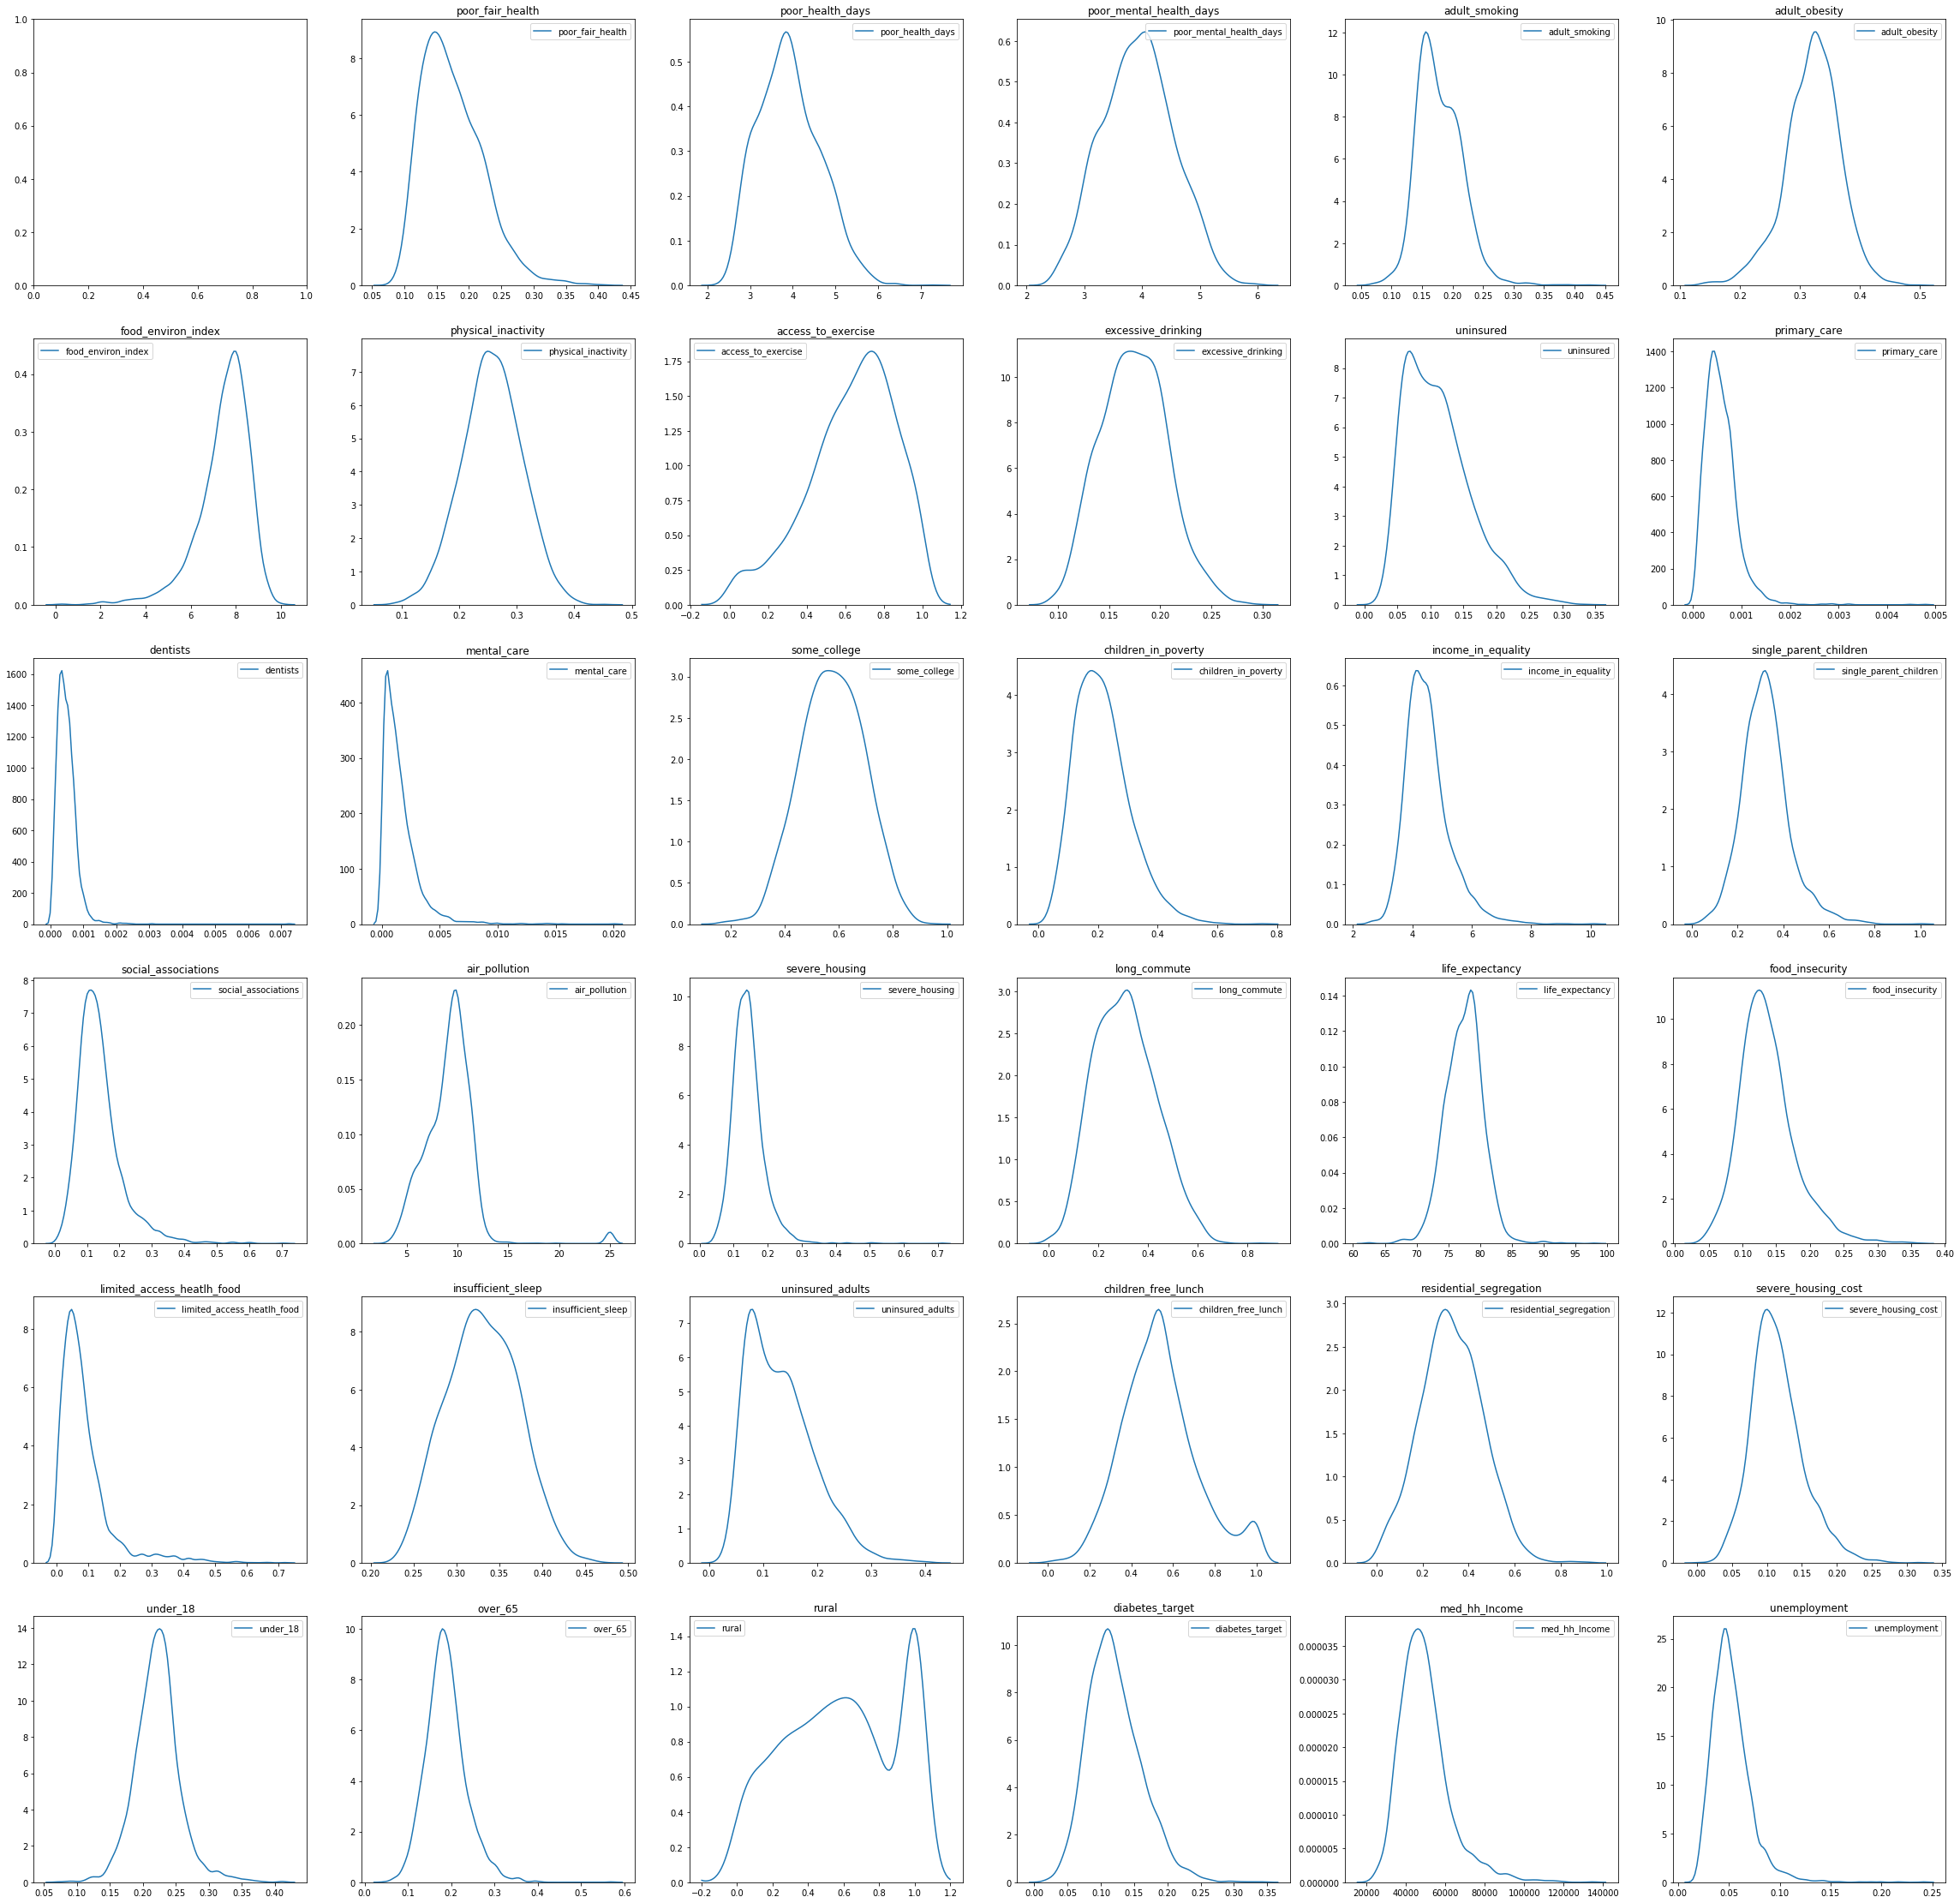

In [352]:
fig2, axes2 = plt.subplots(6, 6, figsize = (40,40))
print(axes2.shape)


for n in range(2,37):
    
    i = df_diabetes_county_2.dtypes.index[n-1]
    
    row = (n-1)//6
    col = (n-1)%6
    
    ax = axes2[row][col]
    sns.kdeplot(df_diabetes_county_2[i], ax = ax)
    ax.set_title('{}'.format(i));

### Check for Multicollinearity

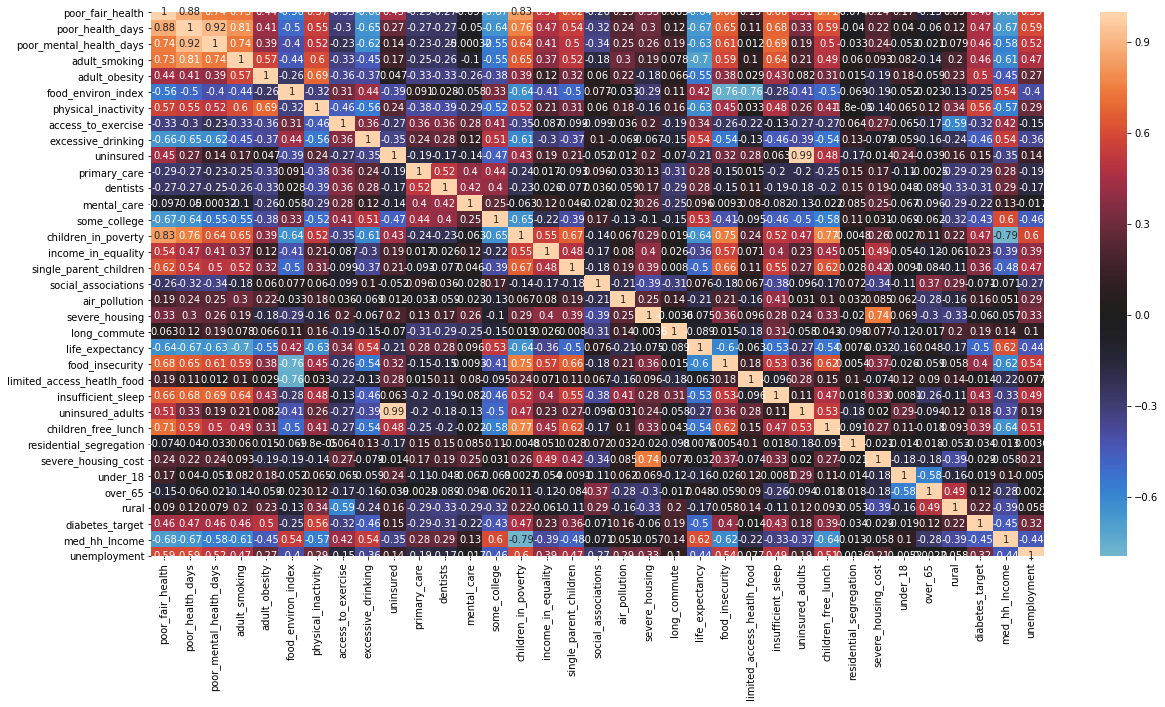

In [353]:
fig = plt.figure(figsize = (20,10))
sns.heatmap(df_diabetes_county_2.corr(), center=0, annot=True);

high correlation between certain variable pairs with some variables showing high correlation with multiplie other variables

In [354]:
cols_to_remove = ['uninsured_adults',
'severe_housing_cost',
'med_hh_Income',
'life_expectancy',
'some_college',
'poor_fair_health',
'poor_health_days',
'poor_mental_health_days',
'children_free_lunch',
'adult_obesity',
'food_environ_index',
'food_insecurity']

In [355]:
df_diabetes_county_stripped = df_diabetes_county_2.loc[:, [col for col in df_diabetes_county_2.columns if col not in cols_to_remove]]

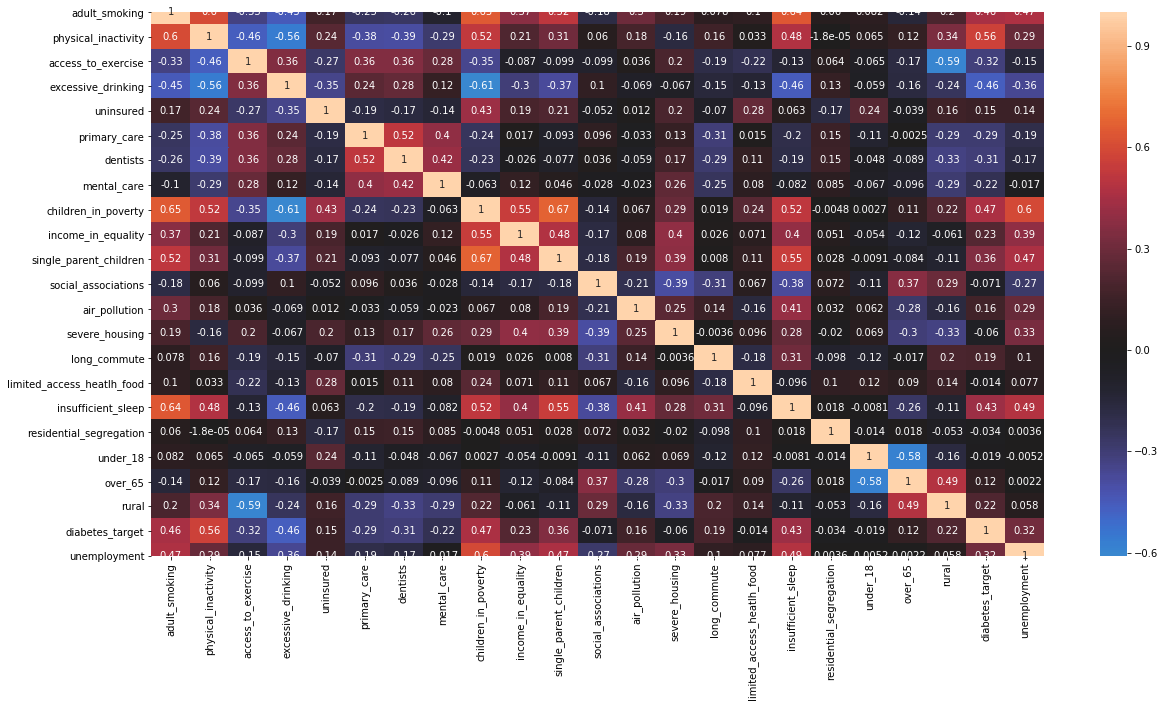

In [356]:
fig = plt.figure(figsize = (20,10))
sns.heatmap(df_diabetes_county_stripped.corr(), center=0, annot = True);

correlations of +|0.7| have been removed

In [357]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [358]:
vif_check_df = df_diabetes_county_stripped.loc[:,[x for x in df_diabetes_county_stripped.columns if x not in  ['FIPS_code', 'diabetes_target']]]

In [359]:
def takeSecond(elem):
    return abs(elem[1])

In [360]:
vif = [variance_inflation_factor(vif_check_df.values, i) for i in range(vif_check_df.shape[1])]
VIF_list = list(zip([x for x in df_diabetes_county_stripped.columns if x not in  ['FIPS_code', 'diabetes_target']], vif))

In [361]:
VIF_list.sort(key = takeSecond, reverse = 1)

In [362]:
VIF_list

[('insufficient_sleep', 164.04793391507246),
 ('adult_smoking', 77.94035413440083),
 ('physical_inactivity', 70.2929015446933),
 ('income_in_equality', 61.23513090639436),
 ('under_18', 48.345428325543025),
 ('excessive_drinking', 41.82138444098326),
 ('over_65', 31.810502109108818),
 ('children_in_poverty', 31.673196633075708),
 ('single_parent_children', 24.487548105165722),
 ('air_pollution', 20.81146314147357),
 ('severe_housing', 20.44768965540287),
 ('access_to_exercise', 16.65637250879622),
 ('unemployment', 16.432545821039728),
 ('rural', 12.022337103990857),
 ('long_commute', 11.975492270037533),
 ('uninsured', 9.92260438872682),
 ('social_associations', 8.337411111929299),
 ('residential_segregation', 7.810330874636325),
 ('primary_care', 6.389532640292549),
 ('dentists', 6.111160645661181),
 ('mental_care', 2.814526250172604),
 ('limited_access_heatlh_food', 2.790384786694803)]

In [363]:
i = 0
max_i = len(VIF_list)-5
col_name = ['FIPS_code', 'diabetes_target']
VIF_columns = [(len(VIF_list), VIF_list)]

In [364]:
for i in range (1, max_i):

    col_name.append(VIF_list[0][0])
    
    vif_check_df = df_diabetes_county_stripped.loc[:,[x for x in df_diabetes_county_stripped.columns if x not in col_name]]

    vif = [variance_inflation_factor(vif_check_df.values, i) for i in range(vif_check_df.shape[1])]
    VIF_list = list(zip([x for x in df_diabetes_county_stripped.columns if x not in  col_name], vif))

    VIF_list.sort(key = takeSecond, reverse = 1)

    VIF_columns.append((len(VIF_list), VIF_list))

In [365]:
VIF_columns

[(22,
  [('insufficient_sleep', 164.04793391507246),
   ('adult_smoking', 77.94035413440083),
   ('physical_inactivity', 70.2929015446933),
   ('income_in_equality', 61.23513090639436),
   ('under_18', 48.345428325543025),
   ('excessive_drinking', 41.82138444098326),
   ('over_65', 31.810502109108818),
   ('children_in_poverty', 31.673196633075708),
   ('single_parent_children', 24.487548105165722),
   ('air_pollution', 20.81146314147357),
   ('severe_housing', 20.44768965540287),
   ('access_to_exercise', 16.65637250879622),
   ('unemployment', 16.432545821039728),
   ('rural', 12.022337103990857),
   ('long_commute', 11.975492270037533),
   ('uninsured', 9.92260438872682),
   ('social_associations', 8.337411111929299),
   ('residential_segregation', 7.810330874636325),
   ('primary_care', 6.389532640292549),
   ('dentists', 6.111160645661181),
   ('mental_care', 2.814526250172604),
   ('limited_access_heatlh_food', 2.790384786694803)]),
 (21,
  [('adult_smoking', 68.27066667671603),

In [366]:
features_to_keep = [element[1] for element in VIF_columns if element[0] == 12]

In [367]:
features_to_keep = [element[0] for element in features_to_keep[0] if element[0] != 'rural']+ ['physical_inactivity']

In [368]:
features_to_keep

['air_pollution',
 'access_to_exercise',
 'children_in_poverty',
 'long_commute',
 'uninsured',
 'residential_segregation',
 'social_associations',
 'primary_care',
 'dentists',
 'mental_care',
 'limited_access_heatlh_food',
 'physical_inactivity']

In [369]:
df_diabetes_final = df_diabetes_county_stripped.loc[:, features_to_keep + ['diabetes_target']]

In [370]:
df_diabetes_final

,air_pollution,access_to_exercise,children_in_poverty,long_commute,uninsured,residential_segregation,social_associations,primary_care,dentists,mental_care,limited_access_heatlh_food,physical_inactivity,diabetes_target
2,11.7,0.686775,0.193,0.383,0.085010,0.271476,0.126317,0.000415,0.000324,0.000162,0.119911,0.311,0.111
3,10.3,0.719710,0.147,0.405,0.106993,0.332401,0.106922,0.000729,0.000499,0.000912,0.054244,0.238,0.107
4,11.5,0.536257,0.503,0.338,0.125132,0.243138,0.084729,0.000385,0.000356,0.000079,0.107397,0.282,0.176
5,11.2,0.162514,0.273,0.486,0.096801,0.384994,0.101577,0.000574,0.000265,0.000088,0.026016,0.349,0.145
6,11.7,0.229493,0.185,0.597,0.121140,0.212058,0.090115,0.000225,0.000207,0.000103,0.028801,0.285,0.170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,5.1,0.901452,0.134,0.186,0.127509,0.363782,0.099626,0.000340,0.000528,0.002297,0.108453,0.256,0.088
3190,4.9,0.997182,0.069,0.146,0.149793,0.397454,0.181105,0.001207,0.000860,0.004169,0.074095,0.120,0.022
3191,5.9,0.813003,0.118,0.178,0.125690,0.138651,0.052953,0.000385,0.000829,0.003415,0.097272,0.235,0.113
3192,4.8,0.818352,0.140,0.106,0.167082,0.135906,0.194293,0.000486,0.000744,0.003472,0.036216,0.260,0.117


## <font color=blue>Regression Model Builds<font/>

###  Baseline Model:

A baseline regression model will be built using just the 12 chosen features (without any interaction, polynomial or other transformations applied)

In [371]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [372]:
target = df_diabetes_final['diabetes_target']
features = df_diabetes_final.drop(columns=['diabetes_target'])

train test split

In [373]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=20, test_size=0.33)

In [374]:
y_train

435     0.160
1585    0.204
22      0.182
2960    0.176
1092    0.123
        ...  
1454    0.070
2485    0.089
3021    0.112
278     0.050
2566    0.110
Name: diabetes_target, Length: 2105, dtype: float64

In [375]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

2105
2105
1037
1037


initialise folds (to be applied on the train data)

In [376]:
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)

In [377]:
regression = LinearRegression()

In [378]:
baseline = cross_validate(regression, X_train, y_train, scoring=('r2'), cv=crossvalidation, return_train_score=True)

In [379]:
baseline

{'fit_time': array([0.00496197, 0.00410223, 0.00328827, 0.00318313, 0.00317073]),
 'score_time': array([0.00166678, 0.00136185, 0.00156069, 0.00153399, 0.00156999]),
 'test_score': array([0.41336149, 0.40119336, 0.3907948 , 0.34299359, 0.38917135]),
 'train_score': array([0.39181079, 0.39557247, 0.39893113, 0.40989649, 0.3972724 ])}

In [380]:
print('train_r2:',baseline['train_score'].mean())
print('test_r2:',baseline['test_score'].mean())

train_r2: 0.3986966567391014
test_r2: 0.3875029176608936


### Baseline score is 39%

## Transformations - Interactions, Polynomial, Normalisation, Scaling

In [381]:
from sklearn.preprocessing import PolynomialFeatures

In [382]:
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)

In [383]:
X_poly_train = pd.DataFrame(poly.fit_transform(X_train), columns=poly.get_feature_names(features.columns))
X_poly_test = pd.DataFrame(poly.transform(X_test), columns=poly.get_feature_names(features.columns))
X_poly_train.head()

,air_pollution,access_to_exercise,children_in_poverty,long_commute,uninsured,residential_segregation,social_associations,primary_care,dentists,mental_care,limited_access_heatlh_food,physical_inactivity,air_pollution^2,air_pollution access_to_exercise,air_pollution children_in_poverty,air_pollution long_commute,air_pollution uninsured,air_pollution residential_segregation,air_pollution social_associations,air_pollution primary_care,air_pollution dentists,air_pollution mental_care,air_pollution limited_access_heatlh_food,air_pollution physical_inactivity,access_to_exercise^2,access_to_exercise children_in_poverty,access_to_exercise long_commute,access_to_exercise uninsured,access_to_exercise residential_segregation,access_to_exercise social_associations,access_to_exercise primary_care,access_to_exercise dentists,access_to_exercise mental_care,access_to_exercise limited_access_heatlh_food,access_to_exercise physical_inactivity,children_in_poverty^2,children_in_poverty long_commute,children_in_poverty uninsured,children_in_poverty residential_segregation,children_in_poverty social_associations,children_in_poverty primary_care,children_in_poverty dentists,children_in_poverty mental_care,children_in_poverty limited_access_heatlh_food,children_in_poverty physical_inactivity,long_commute^2,long_commute uninsured,long_commute residential_segregation,long_commute social_associations,long_commute primary_care,long_commute dentists,long_commute mental_care,long_commute limited_access_heatlh_food,long_commute physical_inactivity,uninsured^2,uninsured residential_segregation,uninsured social_associations,uninsured primary_care,uninsured dentists,uninsured mental_care,uninsured limited_access_heatlh_food,uninsured physical_inactivity,residential_segregation^2,residential_segregation social_associations,residential_segregation primary_care,residential_segregation dentists,residential_segregation mental_care,residential_segregation limited_access_heatlh_food,residential_segregation physical_inactivity,social_associations^2,social_associations primary_care,social_associations dentists,social_associations mental_care,social_associations limited_access_heatlh_food,social_associations physical_inactivity,primary_care^2,primary_care dentists,primary_care mental_care,primary_care limited_access_heatlh_food,primary_care physical_inactivity,dentists^2,dentists mental_care,dentists limited_access_heatlh_food,dentists physical_inactivity,mental_care^2,mental_care limited_access_heatlh_food,mental_care physical_inactivity,limited_access_heatlh_food^2,limited_access_heatlh_food physical_inactivity,physical_inactivity^2,air_pollution^3,air_pollution^2 access_to_exercise,air_pollution^2 children_in_poverty,air_pollution^2 long_commute,air_pollution^2 uninsured,air_pollution^2 residential_segregation,air_pollution^2 social_associations,air_pollution^2 primary_care,air_pollution^2 dentists,air_pollution^2 mental_care,air_pollution^2 limited_access_heatlh_food,air_pollution^2 physical_inactivity,air_pollution access_to_exercise^2,air_pollution access_to_exercise children_in_poverty,air_pollution access_to_exercise long_commute,air_pollution access_to_exercise uninsured,air_pollution access_to_exercise residential_segregation,air_pollution access_to_exercise social_associations,air_pollution access_to_exercise primary_care,air_pollution access_to_exercise dentists,air_pollution access_to_exercise mental_care,air_pollution access_to_exercise limited_access_heatlh_food,air_pollution access_to_exercise physical_inactivity,air_pollution children_in_poverty^2,air_pollution children_in_poverty long_commute,air_pollution children_in_poverty uninsured,air_pollution children_in_poverty residential_segregation,air_pollution children_in_poverty social_associations,air_pollution children_in_poverty primary_care,air_pollution children_in_poverty dentists,air_pollution children_in_poverty mental_care,air_pollution children_in_poverty limited_access_heatlh_food,air_pollution 

In [384]:
len(X_poly_train.columns)

454

The following function will apply Log transformation to all variables; original features and polynomial transformed features.

def loggy(df):
    
    if str(type(df)) == "<class 'pandas.core.series.Series'>":
        logged = pd.DataFrame(df, columns = [df.name]).copy()
    else:
        logged = df.copy() 

    for col in [x for x in logged.columns if x not in ['FIPS_code', 'physical_inactivity']]:
    
        if col != 'rural':
    
            logged[col] = np.log(logged[col])
        
        else:
            # rural ranges from contains negative values and it is not possible to apply log to -ive numbers
            # therefore we add 10 to every value to shift into +ive and then apply log.
            logged[col] = np.log(logged[col]+10) 
    return logged

X_poly_train_logged = loggy(X_poly_train)
X_poly_test_logged = loggy(X_poly_test)

X_poly_train_logged.shape

fig2, axes2 = plt.subplots(4, 4, figsize = (20,15))
print(axes2.shape)


for n in range(1,16):
    
    i = X_poly_train_logged.dtypes.index[n-1]
    
    row = (n-1)//4
    col = (n-1)%4
    
    ax = axes2[row][col]
    sns.kdeplot(X_poly_train_logged[i], ax = ax)
    ax.set_title('{}'.format(i));

from scipy.stats import normaltest

for col in X_poly_train_logged.columns:
    
    if X_poly_train_logged[col].dtype == 'float':
        
        if normaltest(X_poly_train_logged[col]).pvalue > 0.05:
    
            print(col,':', normaltest(X_poly_train_logged[col]).pvalue)

No real improvement has occurred except that the skewness has been decreased for a number of original variables but not enough to bring them into a state of normality.

Nonetheless, we will use the logged variables henceforth

In [385]:
# Initialize the scaler
scaler = StandardScaler()

#   Scale all continuous features
#   scale both train and test data.
transformed_training_features = scaler.fit_transform(X_poly_train)
transformed_testing_features = scaler.transform(X_poly_test)

In [386]:
X_train_transformed = pd.DataFrame(scaler.transform(X_poly_train), 
                                   columns=X_poly_train.columns, 
                                   index=X_poly_train.index)

In [387]:
X_test_transformed = pd.DataFrame(scaler.transform(X_poly_test), 
                                   columns=X_poly_test.columns, 
                                   index=X_poly_test.index)

In [388]:
from sklearn.model_selection import cross_validate

In [389]:
X_train_transformed.head()

,air_pollution,access_to_exercise,children_in_poverty,long_commute,uninsured,residential_segregation,social_associations,primary_care,dentists,mental_care,limited_access_heatlh_food,physical_inactivity,air_pollution^2,air_pollution access_to_exercise,air_pollution children_in_poverty,air_pollution long_commute,air_pollution uninsured,air_pollution residential_segregation,air_pollution social_associations,air_pollution primary_care,air_pollution dentists,air_pollution mental_care,air_pollution limited_access_heatlh_food,air_pollution physical_inactivity,access_to_exercise^2,access_to_exercise children_in_poverty,access_to_exercise long_commute,access_to_exercise uninsured,access_to_exercise residential_segregation,access_to_exercise social_associations,access_to_exercise primary_care,access_to_exercise dentists,access_to_exercise mental_care,access_to_exercise limited_access_heatlh_food,access_to_exercise physical_inactivity,children_in_poverty^2,children_in_poverty long_commute,children_in_poverty uninsured,children_in_poverty residential_segregation,children_in_poverty social_associations,children_in_poverty primary_care,children_in_poverty dentists,children_in_poverty mental_care,children_in_poverty limited_access_heatlh_food,children_in_poverty physical_inactivity,long_commute^2,long_commute uninsured,long_commute residential_segregation,long_commute social_associations,long_commute primary_care,long_commute dentists,long_commute mental_care,long_commute limited_access_heatlh_food,long_commute physical_inactivity,uninsured^2,uninsured residential_segregation,uninsured social_associations,uninsured primary_care,uninsured dentists,uninsured mental_care,uninsured limited_access_heatlh_food,uninsured physical_inactivity,residential_segregation^2,residential_segregation social_associations,residential_segregation primary_care,residential_segregation dentists,residential_segregation mental_care,residential_segregation limited_access_heatlh_food,residential_segregation physical_inactivity,social_associations^2,social_associations primary_care,social_associations dentists,social_associations mental_care,social_associations limited_access_heatlh_food,social_associations physical_inactivity,primary_care^2,primary_care dentists,primary_care mental_care,primary_care limited_access_heatlh_food,primary_care physical_inactivity,dentists^2,dentists mental_care,dentists limited_access_heatlh_food,dentists physical_inactivity,mental_care^2,mental_care limited_access_heatlh_food,mental_care physical_inactivity,limited_access_heatlh_food^2,limited_access_heatlh_food physical_inactivity,physical_inactivity^2,air_pollution^3,air_pollution^2 access_to_exercise,air_pollution^2 children_in_poverty,air_pollution^2 long_commute,air_pollution^2 uninsured,air_pollution^2 residential_segregation,air_pollution^2 social_associations,air_pollution^2 primary_care,air_pollution^2 dentists,air_pollution^2 mental_care,air_pollution^2 limited_access_heatlh_food,air_pollution^2 physical_inactivity,air_pollution access_to_exercise^2,air_pollution access_to_exercise children_in_poverty,air_pollution access_to_exercise long_commute,air_pollution access_to_exercise uninsured,air_pollution access_to_exercise residential_segregation,air_pollution access_to_exercise social_associations,air_pollution access_to_exercise primary_care,air_pollution access_to_exercise dentists,air_pollution access_to_exercise mental_care,air_pollution access_to_exercise limited_access_heatlh_food,air_pollution access_to_exercise physical_inactivity,air_pollution children_in_poverty^2,air_pollution children_in_poverty long_commute,air_pollution children_in_poverty uninsured,air_pollution children_in_poverty residential_segregation,air_pollution children_in_poverty social_associations,air_pollution children_in_poverty primary_care,air_pollution children_in_poverty dentists,air_pollution children_in_poverty mental_care,air_pollution children_in_poverty limited_access_heatlh_food,air_pollution 

In [390]:
baseline_poly = cross_validate(regression, X_train_transformed, y_train, scoring=('r2', 'neg_mean_squared_error'), cv=crossvalidation,
                              return_train_score=True)

In [391]:
baseline_poly

{'fit_time': array([0.22646499, 0.08628821, 0.07309222, 0.07635999, 0.07050014]),
 'score_time': array([0.00416088, 0.00302291, 0.00229597, 0.00274086, 0.00228786]),
 'test_r2': array([-7.30610731, -0.53511724, -8.16580151, -0.18068067, -0.62207412]),
 'train_r2': array([0.58585291, 0.59993494, 0.59053773, 0.60122993, 0.60324471]),
 'test_neg_mean_squared_error': array([-0.01280673, -0.00238682, -0.01642241, -0.00183986, -0.00250353]),
 'train_neg_mean_squared_error': array([-0.0006693 , -0.00064468, -0.00063633, -0.00064276, -0.00064016])}

In [392]:
print('train_r2:',baseline_poly['train_r2'].mean())
print('test_r2:',baseline_poly['test_r2'].mean())

train_r2: 0.5961600455589346
test_r2: -3.3619561695089977


### Polynomial model score is -3.36%

Second model build with transformations applied shows massive drop in performance. Major overfitting.

## Feature Selection Method - Recursive (Backward) Selection

In [393]:
from sklearn.feature_selection import RFE

In [405]:
rfe = RFE(LinearRegression(), step = 10000)
X_rfe_train = rfe.fit_transform(X_train_transformed, y_train)

recursive = cross_validate(regression, X_rfe_train, y_train, scoring=('r2', 'neg_mean_squared_error'), cv=crossvalidation,
                              return_train_score=True)

In [406]:
print('train_r2:',recursive['train_r2'].mean())
print('test_r2:',recursive['test_r2'].mean())

train_r2: 0.5432526625568792
test_r2: 0.15938395925815776


### RFE score is 15%

Third model build via Backward Selection method shows improvement but still massivley overfit.

## Regularization Methods Through Recursive Feature Selection

In [407]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

the following loop will apply three different regularization models to the recursive model; Lasso, Ridge, ElasticNet

In [408]:
model_score_df = pd.DataFrame([], columns = ['model', 'alpha', 'train_r2', 'valid_r2'])

i = 0

for model_type in ['Lasso', 'Ridge', 'ElasticNet']:
    for alpha in np.linspace(0.00000001, 0.5, 200):

        exec(f'model = {model_type}(alpha = alpha)')
        model.fit(X_rfe_train, y_train)

        model_scores = cross_validate(model, X_rfe_train, y_train, scoring=('r2', 'neg_mean_squared_error'), cv=crossvalidation,
                      return_train_score=True)
    
    
        df_delete = pd.DataFrame({'model': model_type, 'alpha': alpha, 'train_r2': model_scores['train_r2'].mean(), 'valid_r2': model_scores['test_r2'].mean()}, index=[i])
    
        model_score_df = model_score_df.append(df_delete)
    
        i += 1

/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8438017580537569, tolerance: 0.00033714048627078393
  positive)
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6710523693458923, tolerance: 0.000272150841567696
  positive)
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6543775347980052, tolerance: 0.00027136631989311166
  positive)
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not 

In [534]:
# DataFrame of the 200 different values of lambda (alpha) tried for each of the three regularization methods

model_score_df

,model,alpha,train_r2,valid_r2
0,Lasso,1.000000e-08,0.513749,0.227030
1,Lasso,2.512573e-03,0.386158,0.373375
2,Lasso,5.025136e-03,0.360236,0.354070
3,Lasso,7.537698e-03,0.333081,0.327915
4,Lasso,1.005026e-02,0.298011,0.293069
...,...,...,...,...
595,ElasticNet,4.899497e-01,0.000000,-0.003631
596,ElasticNet,4.924623e-01,0.000000,-0.003631
597,ElasticNet,4.949749e-01,0.000000,-0.003631
598,ElasticNet,4.974874e-01,0.000000,-0.003631


In [535]:
# sort descending by valid_r2 to obtain the best performing regularization method and its corresponding lambda(alpha) 
# hyperparameter.

model_score_df.sort_values(by=['valid_r2'], ascending=False)

,model,alpha,train_r2,valid_r2
401,ElasticNet,0.002513,0.401802,0.384493
1,Lasso,0.002513,0.386158,0.373375
402,ElasticNet,0.005025,0.386087,0.373215
403,ElasticNet,0.007538,0.372304,0.363814
2,Lasso,0.005025,0.360236,0.354070
...,...,...,...,...
76,Lasso,0.190955,0.000000,-0.003631
77,Lasso,0.193467,0.000000,-0.003631
78,Lasso,0.195980,0.000000,-0.003631
79,Lasso,0.198492,0.000000,-0.003631


In [536]:
# best performing regularization method and lambda combination is:

best_performer = model_score_df.loc[model_score_df['valid_r2'] == max(model_score_df['valid_r2'])]

In [537]:
best_performer

,model,alpha,train_r2,valid_r2
401,ElasticNet,0.002513,0.401802,0.384493


The ElasticNet model with lambda = 0.002513 returned the best score out of all the regularization models. However, the R-squared score is not much of an improvement to our baseline model (before any transformations).

Depending on the interpretability of this model and the number of coefficients it may be more appropriate to adopt the baseline model as the difference in R-squared is negligible.

rebuild the above 'best performing' model in order to extract the feature coefficients

In [546]:
model = ElasticNet(alpha = 0.002513)
model.fit(X_rfe_train, y_train)

ElasticNet(alpha=0.002513, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [547]:
model.coef_.reshape([1,len(model.coef_)]).shape

(1, 227)

In [548]:
sum(model.coef_ != 0)

18

18 features have been retained by the ElasticNet model

In [549]:
col_names = [list(X_train_transformed.columns)[index] for index in rfe.get_support(indices = True)]

In [550]:
features_for_model = pd.DataFrame(model.coef_.reshape([1,len(model.coef_)]), columns = col_names)

In [551]:
features_for_model

,air_pollution,access_to_exercise,children_in_poverty,long_commute,dentists,physical_inactivity,air_pollution^2,air_pollution access_to_exercise,air_pollution children_in_poverty,air_pollution long_commute,air_pollution residential_segregation,air_pollution social_associations,air_pollution primary_care,air_pollution limited_access_heatlh_food,air_pollution physical_inactivity,access_to_exercise^2,access_to_exercise children_in_poverty,access_to_exercise long_commute,access_to_exercise uninsured,access_to_exercise residential_segregation,access_to_exercise social_associations,access_to_exercise primary_care,access_to_exercise dentists,access_to_exercise mental_care,access_to_exercise limited_access_heatlh_food,access_to_exercise physical_inactivity,children_in_poverty^2,children_in_poverty long_commute,children_in_poverty residential_segregation,children_in_poverty social_associations,children_in_poverty primary_care,children_in_poverty dentists,children_in_poverty mental_care,children_in_poverty limited_access_heatlh_food,children_in_poverty physical_inactivity,long_commute uninsured,long_commute social_associations,long_commute primary_care,long_commute mental_care,long_commute physical_inactivity,uninsured^2,uninsured residential_segregation,uninsured social_associations,uninsured primary_care,uninsured mental_care,uninsured limited_access_heatlh_food,residential_segregation primary_care,residential_segregation mental_care,residential_segregation limited_access_heatlh_food,residential_segregation physical_inactivity,social_associations^2,social_associations primary_care,social_associations limited_access_heatlh_food,social_associations physical_inactivity,primary_care^2,primary_care mental_care,primary_care limited_access_heatlh_food,primary_care physical_inactivity,dentists^2,dentists mental_care,dentists limited_access_heatlh_food,dentists physical_inactivity,mental_care^2,mental_care limited_access_heatlh_food,limited_access_heatlh_food^2,limited_access_heatlh_food physical_inactivity,physical_inactivity^2,air_pollution^2 access_to_exercise,air_pollution^2 children_in_poverty,air_pollution^2 long_commute,air_pollution^2 physical_inactivity,air_pollution access_to_exercise^2,air_pollution access_to_exercise children_in_poverty,air_pollution access_to_exercise long_commute,air_pollution access_to_exercise residential_segregation,air_pollution access_to_exercise primary_care,air_pollution access_to_exercise mental_care,air_pollution access_to_exercise limited_access_heatlh_food,air_pollution access_to_exercise physical_inactivity,air_pollution children_in_poverty^2,air_pollution children_in_poverty long_commute,air_pollution children_in_poverty primary_care,air_pollution children_in_poverty mental_care,air_pollution children_in_poverty limited_access_heatlh_food,air_pollution children_in_poverty physical_inactivity,air_pollution long_commute residential_segregation,air_pollution long_commute physical_inactivity,air_pollution uninsured^2,air_pollution uninsured social_associations,air_pollution uninsured dentists,air_pollution uninsured physical_inactivity,air_pollution residential_segregation primary_care,air_pollution residential_segregation limited_access_heatlh_food,air_pollution residential_segregation physical_inactivity,air_pollution social_associations dentists,air_pollution primary_care limited_access_heatlh_food,air_pollution dentists mental_care,air_pollution dentists physical_inactivity,air_pollution mental_care^2,air_pollution mental_care limited_access_heatlh_food,air_pollution mental_care physical_inactivity,air_pollution limited_access_heatlh_food^2,air_pollution limited_access_heatlh_food physical_inactivity,access_to_exercise^3,access_to_exercise^2 social_associations,access_to_exercise^2 dentists,access_to_exercise children_in_poverty^2,access_to_exercise children_in_poverty long_commute,access_to_exercise children_in_poverty primary_care,access_to_exercise children_in_poverty mental_care,access_to_exercis

In [552]:
features_for_model.loc[:, (features_for_model != 0).all(axis = 0)]

,children_in_poverty,physical_inactivity,air_pollution physical_inactivity,children_in_poverty physical_inactivity,long_commute mental_care,uninsured mental_care,uninsured limited_access_heatlh_food,dentists limited_access_heatlh_food,limited_access_heatlh_food^2,air_pollution access_to_exercise mental_care,air_pollution children_in_poverty long_commute,access_to_exercise^3,access_to_exercise long_commute dentists,access_to_exercise residential_segregation mental_care,uninsured^3,uninsured^2 dentists,uninsured social_associations primary_care,social_associations^2 dentists
0,0.005126,0.012988,0.000999,0.002011,-0.000566,-0.000279,-0.000281,-0.00057,-0.000508,-0.000126,0.004736,-0.000815,-0.000561,-0.000602,-0.000409,-0.001478,-0.00106,-0.000579


In [553]:
cols_features = features_for_model.loc[:, (features_for_model != 0).all(axis = 0)].columns

In [554]:
vals_features = features_for_model.loc[:, (features_for_model != 0).all(axis = 0)].values[0]

In [555]:
coeftts = [(cols_features[i], round(vals_features[i], 4)) for i in range(0,len(vals_features))]

In [556]:
coeftts.sort(key = takeSecond, reverse = 1)

In [557]:
coeftts

[('physical_inactivity', 0.013),
 ('children_in_poverty', 0.0051),
 ('air_pollution children_in_poverty long_commute', 0.0047),
 ('children_in_poverty physical_inactivity', 0.002),
 ('uninsured^2 dentists', -0.0015),
 ('uninsured social_associations primary_care', -0.0011),
 ('air_pollution physical_inactivity', 0.001),
 ('access_to_exercise^3', -0.0008),
 ('long_commute mental_care', -0.0006),
 ('dentists limited_access_heatlh_food', -0.0006),
 ('access_to_exercise long_commute dentists', -0.0006),
 ('access_to_exercise residential_segregation mental_care', -0.0006),
 ('social_associations^2 dentists', -0.0006),
 ('limited_access_heatlh_food^2', -0.0005),
 ('uninsured^3', -0.0004),
 ('uninsured mental_care', -0.0003),
 ('uninsured limited_access_heatlh_food', -0.0003),
 ('air_pollution access_to_exercise mental_care', -0.0001)]

These are the 18 (scaled) features with their corresponding coefficient values. The polynomial features are very difficult to explain.

Based on the difficulty in interetability of the above model it is more appropriate to adopt the baseline model without any polynomials of interactions

rebuild baseline model in stats.models in order to obtain p-values of feature coeffts.

We will build two baseline models; the first based on scaled values to identify the most influential features and the second model will include raw feature values to facilitate interpretation.

#### Scaled Baseline Model

In [558]:
import statsmodels.api as sm
X_train_2 = sm.add_constant(X_train_base_scaled)
model = sm.OLS(y_train,X_train_2)
results = model.fit()

results.summary()

/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        diabetes_target   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     115.2
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          4.31e-220
Time:                        12:45:15   Log-Likelihood:                 4321.6
No. Observations:                2105   AIC:                            -8617.
Df Residuals:                    2092   BIC:                            -8544.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1208      0.001    177.897      0.000       0.119       0.122
air_pollution                  0.0016      0.001      2.279      0.023       0.000       0.003
access_to_exercise            -0.0019      0.001     -2.266      0.024      -0.004      -0.000
children_in_poverty            0.0112      0.001     12.237      0.000       0.009       0.013
long_commute                   0.0013      0.001      1.637      0.102      -0.000       0.003
uninsured                     -0.0038      0.001     -4.716      0.000      -0.005      -0.002
residential_segregation       -0.0004      0.001     -0.580      0.562      -0.002       0.001
social_associations           -0.0018      0.001     -2.311      0.021      -0.003      -0.000
primary_care                  -0.0008      0.001     -0.871      0.384      -0.002       0.001
dentists                      -0.0015      0.001     -1.655      0.098      -0.003       0.000
mental_care                   -0.0023      0.001     -2.877      0.004      -0.004      -0.001
limited_access_heatlh_food    -0.0026      0.001     -3.411      0.001      -0.004      -0.001
physical_inactivity            0.0150      0.001     16.021      0.000       0.013       0.017
==============================================================================
Omnibus:                      225.499   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              582.593
Skew:                           0.599   Prob(JB):                    3.10e-127
Kurtosis:                       5.282   Cond. No.                         3.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Raw Baseline Model

In [519]:
X_train_2 = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train_2)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        diabetes_target   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     115.2
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          4.31e-220
Time:                        11:28:37   Log-Likelihood:                 4321.6
No. Observations:                2105   AIC:                            -8617.
Df Residuals:                    2092   BIC:                            -8544.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0388      0.007      5.347      0.000       0.025       0.053
air_pollution                  0.0006      0.000      2.279      0.023    8.63e-05       0.001
access_to_exercise            -0.0085      0.004     -2.266      0.024      -0.016      -0.001
children_in_poverty            0.1225      0.010     12.237      0.000       0.103       0.142
long_commute                   0.0105      0.006      1.637      0.102      -0.002       0.023
uninsured                     -0.0770      0.016     -4.716      0.000      -0.109      -0.045
residential_segregation       -0.0031      0.005     -0.580      0.562      -0.013       0.007
social_associations           -0.0262      0.011     -2.311      0.021      -0.048      -0.004
primary_care                  -2.2727      2.610     -0.871      0.384      -7.391       2.846
dentists                      -5.6435      3.411     -1.655      0.098     -12.332       1.045
mental_care                   -1.4823      0.515     -2.877      0.004      -2.493      -0.472
limited_access_heatlh_food    -0.0321      0.009     -3.411      0.001      -0.051      -0.014
physical_inactivity            0.2892      0.018     16.021      0.000       0.254       0.325
==============================================================================
Omnibus:                      225.499   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              582.593
Skew:                           0.599   Prob(JB):                    3.10e-127
Kurtosis:                       5.282   Cond. No.                     5.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

based on p_value > 0.05 we will disregard the variables **`long_commute`**, **`residential_segregation`**, **`primary_care`** and **`dentists`** from out final model.

Iterate through each variable and build a linear model in order to identify the features that have the biggest influence on R-squared:

In [456]:
feats = []
for i in range(0, len(base_coeftts)):
    
    feats.append(base_coeftts[i][0])
    XX = X_train.loc[:, feats]
    
    
    X_train_2 = sm.add_constant(XX)
    model = sm.OLS(y_train,X_train_2)
    results = model.fit()

    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        diabetes_target   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     1022.
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          4.57e-183
Time:                        10:43:25   Log-Likelihood:                 4204.6
No. Observations:                2105   AIC:                            -8405.
Df Residuals:                    2103   BIC:                            -8394.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0077    

of the 39.8% R-squared score; **`physical_inactivity`** contributes to the majority of the score (32.7% out of 39.7%), followed by **`children_in_poverty`** (3.7%), followed by **`uninsured`** (0.8%), followed by **`limited_access_to_healthy_food`** (0.7%).

In [227]:
# Initialize the scaler
scaler_base = StandardScaler()

#   Scale all continuous features
#   scale both train and test data.
scaled_base_training_features = scaler_base.fit_transform(X_train)
scaled_base_testing_features = scaler_base.transform(X_test)

In [228]:
X_train_base_scaled = pd.DataFrame(scaler_base.transform(X_train), 
                                   columns=X_train.columns, 
                                   index=X_train.index)

In [229]:
X_test_transformed = pd.DataFrame(scaler_base.transform(X_test), 
                                   columns=X_test.columns, 
                                   index=X_test.index)

In [457]:
feats = []
for i in range(0, len(base_coeftts)):
    
    feats.append(base_coeftts[i][0])
    XX = X_train_base_scaled# Initialize the scaler
scaler_base = StandardScaler()

#   Scale all continuous features
#   scale both train and test data.
scaled_base_training_features = scaler_base.fit_transform(X_train)
scaled_base_testing_features = scaler_base.transform(X_test)

X_train_base_scaled = pd.DataFrame(scaler_base.transform(X_train), 
                                   columns=X_train.columns, 
                                   index=X_train.index)

X_test_transformed = pd.DataFrame(scaler_base.transform(X_test), 
                                   columns=X_test.columns, 
                                   index=X_test.index).loc[:, feats]
    
    
    X_train_2 = sm.add_constant(XX)
    model = sm.OLS(y_train,X_train_2)
    results = model.fit()

    print(results.summary())

/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:        diabetes_target   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     1022.
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          4.57e-183
Time:                        10:50:32   Log-Likelihood:                 4204.6
No. Observations:                2105   AIC:                            -8405.
Df Residuals:                    2103   BIC:                            -8394.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1208    

                            OLS Regression Results                            
Dep. Variable:        diabetes_target   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     115.2
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          4.31e-220
Time:                        10:50:32   Log-Likelihood:                 4321.6
No. Observations:                2105   AIC:                            -8617.
Df Residuals:                    2092   BIC:                            -8544.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Check Assumptions

#### Normality of Residuals

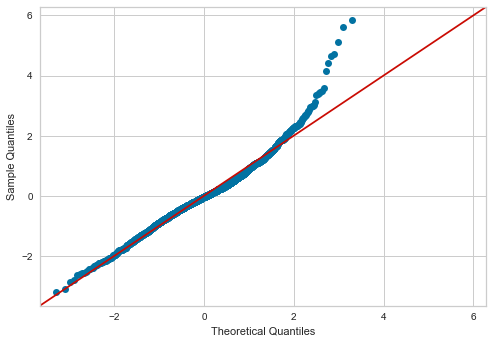

In [560]:
fig = sm.graphics.qqplot(results.resid, dist=stats.norm, line='45', fit=True)

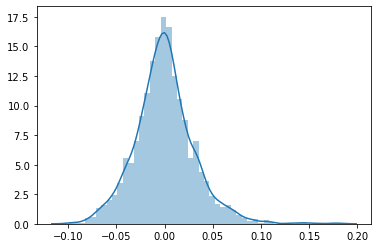

In [486]:
sns.distplot(results.resid, bins = 50)

Residuals not perfectly normal, mainly due to the right skew however, it is acceptable (based on visal inspection).

#### Homoscedasticity (constant variance of residuals)

In [561]:
X_train_3 = X_train.copy()
X_train_3['coefft'] = 1

results.predict(X_train_3)

435     1.310078
1585    1.201483
22      1.310529
2960    1.175784
1092    1.260517
          ...   
1454    1.162601
2485    1.214058
3021    0.791347
278     0.473719
2566    1.360386
Length: 2105, dtype: float64

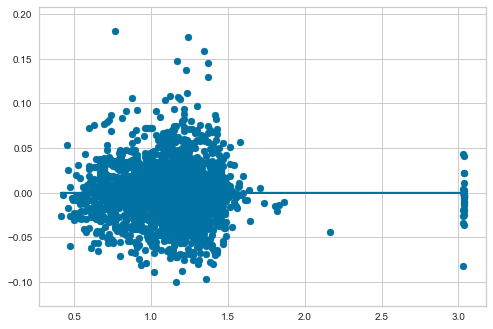

In [566]:
plt.scatter(results.predict(X_train_3), results.resid)
plt.plot(results.predict(X_train_3), [0 for i in range(len(X_train_3))])

not perfectly homoscedastic but acceptable. Not homoscedastic because the residuals exhibit a slight patter, they start to spread out as you go along the x-axis (cone shape) and if this pattern was more evident then homoscedasticity would be definitely violated.

### Apply Model to Test Set and Plot Residuals

In [568]:
#pip install yellowbrick

In [569]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

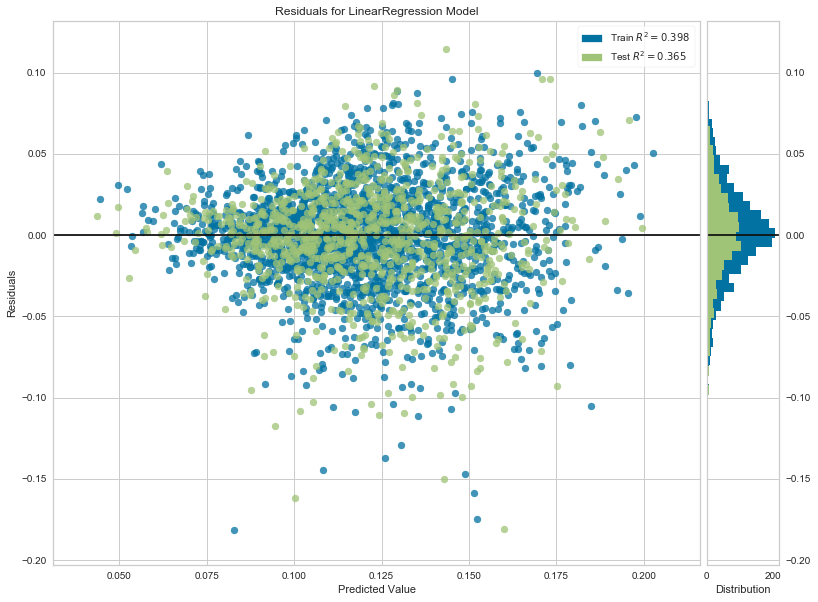

In [571]:
plt.figure(figsize = (13,10))
visualizer = ResidualsPlot(regression)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

Same observations as before with regards to Normality and Homoscedasticity of the test data (light green) as the train data (blue). Also the R-squared of both train and test are very similar with test slightly lower indicating the model has generalised well.

In [231]:
base.coef_.reshape([1,len(base.coef_)]).shape

(1, 12)

In [232]:
sum(base.coef_ != 0)

12

In [235]:
features_for_base_model = pd.DataFrame(base.coef_.reshape([1,len(base.coef_)]), columns = base_col_names)

In [236]:
features_for_base_model

,air_pollution,access_to_exercise,children_in_poverty,long_commute,uninsured,residential_segregation,social_associations,primary_care,dentists,mental_care,limited_access_heatlh_food,physical_inactivity
0,0.001635,-0.001929,0.011193,0.001307,-0.003818,-0.000415,-0.0018,-0.000765,-0.001515,-0.00231,-0.002623,0.015035


In [237]:
features_for_base_model.loc[:, (features_for_base_model != 0).all(axis = 0)]

,air_pollution,access_to_exercise,children_in_poverty,long_commute,uninsured,residential_segregation,social_associations,primary_care,dentists,mental_care,limited_access_heatlh_food,physical_inactivity
0,0.001635,-0.001929,0.011193,0.001307,-0.003818,-0.000415,-0.0018,-0.000765,-0.001515,-0.00231,-0.002623,0.015035


In [238]:
base_cols_features = features_for_base_model.loc[:, (features_for_base_model != 0).all(axis = 0)].columns

In [239]:
base_vals_features = features_for_base_model.loc[:, (features_for_base_model != 0).all(axis = 0)].values[0]

In [240]:
base_coeftts = [(base_cols_features[i], round(base_vals_features[i], 4)) for i in range(0,len(base_vals_features))]

In [241]:
base_coeftts.sort(key = takeSecond, reverse = 1)

In [242]:
base_coeftts

[('physical_inactivity', 0.015),
 ('children_in_poverty', 0.0112),
 ('uninsured', -0.0038),
 ('limited_access_heatlh_food', -0.0026),
 ('mental_care', -0.0023),
 ('access_to_exercise', -0.0019),
 ('social_associations', -0.0018),
 ('air_pollution', 0.0016),
 ('dentists', -0.0015),
 ('long_commute', 0.0013),
 ('primary_care', -0.0008),
 ('residential_segregation', -0.0004)]

In [458]:
y_h_base_train = base.predict(X_train)
y_h_base_test = base.predict(X_test)

In [462]:
print('Train Error Base Model: ', np.sum((y_train - y_h_base_train)**2))
print('Test Error Base Model: ', np.sum((y_test - y_h_base_test)**2))
print('\n')

Train Error Base Model:  3.9418714647987043
Test Error Base Model:  1.9958016234887153




In [463]:
base.coef_

array([ 0.00163526, -0.00192903,  0.01119313,  0.001307  , -0.00381838,
       -0.00041454, -0.0017999 , -0.00076462, -0.0015153 , -0.0023102 ,
       -0.00262274,  0.01503495])

In [467]:
import scipy.stats as stats

In [476]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "diabetes_target", fig=fig)

ValueError: 'diabetes_target' is not in list

<Figure size 864x576 with 0 Axes>

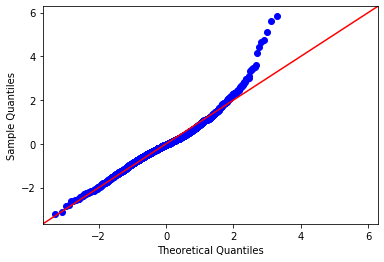

In [494]:
fig = sm.graphics.qqplot(results.resid, dist=stats.norm, line='45', fit=True)
#stats.normaltest(results.resid) 

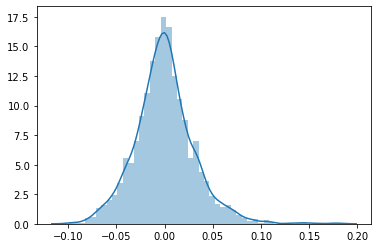

In [486]:
sns.distplot(results.resid, bins = 50)

In [523]:
X_train_3 = X_train.copy()
X_train_3['coefft'] = 1

results.predict(X_train_3)

435     0.629330
1585    0.629080
22      0.477564
2960    0.591109
1092    0.552761
          ...   
1454    0.238474
2485    0.688728
3021    0.367203
278     0.350480
2566    0.690750
Length: 2105, dtype: float64

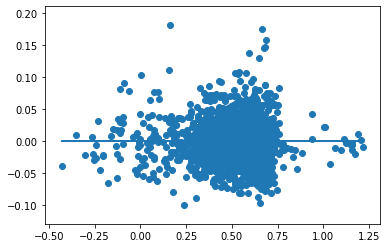

In [525]:
plt.scatter(results.predict(X_train_3), results.resid)
plt.plot(results.predict(X_train_3), [0 for i in range(len(X_train_3))])

In [526]:
#pip install yellowbrick

     |████████████████████████████████| 263 kB 3.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [527]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

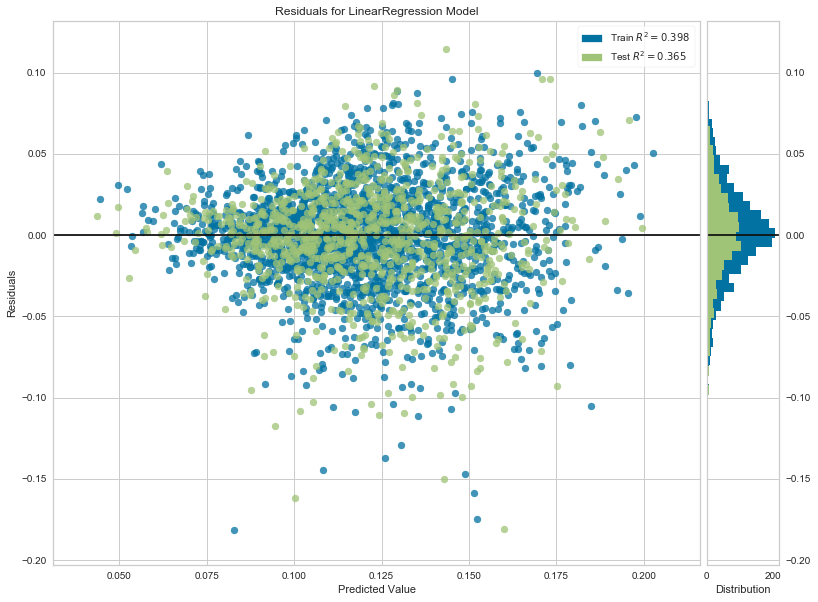

In [533]:
plt.figure(figsize = (13,10))
visualizer = ResidualsPlot(regression)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

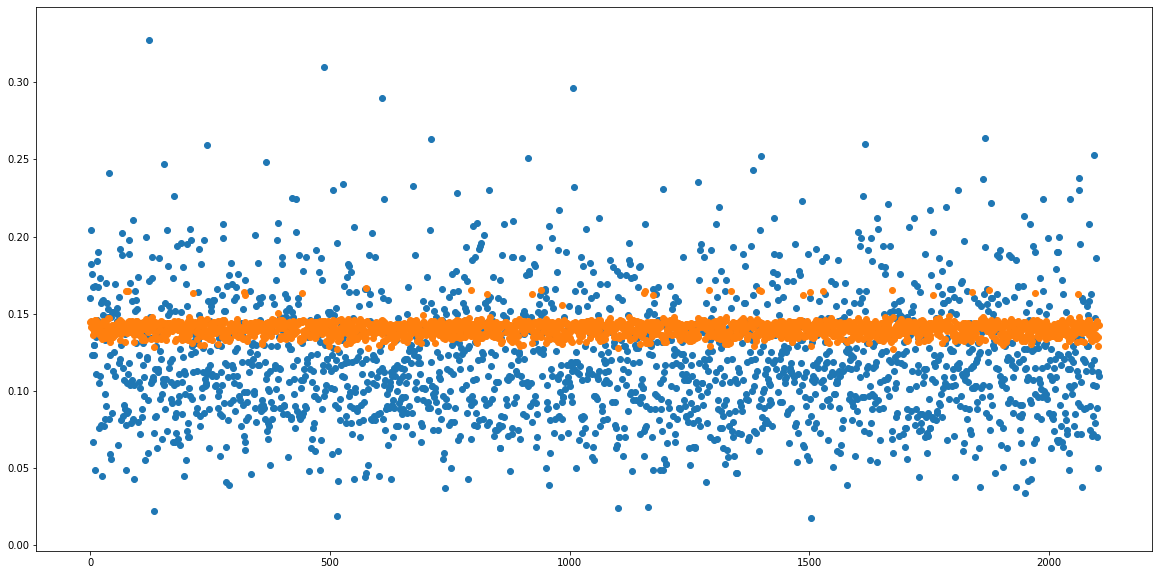

In [266]:
fig = plt.figure(figsize = (20,10))
plt.scatter(range(0, 2105), y_train)
plt.scatter(range(0, 2105), X_pred)

In [257]:
from sklearn.metrics import mean_squared_error, r2_score

In [258]:
r2_score(y_train, X_pred)

-0.1692073854436691

In [254]:
X_train

,air_pollution,access_to_exercise,children_in_poverty,long_commute,uninsured,residential_segregation,social_associations,primary_care,dentists,mental_care,limited_access_heatlh_food,physical_inactivity
435,10.7,0.658552,0.317,0.303,0.181178,0.134689,0.093202,0.000583,0.000289,0.000289,0.059734,0.317
1585,9.8,0.330811,0.106,0.430,0.097945,0.453814,0.109778,0.000146,0.000293,0.000073,0.032326,0.281
22,10.7,0.263771,0.293,0.438,0.115066,0.176003,0.107813,0.000144,0.000144,0.000505,0.170391,0.300
2960,9.6,0.727661,0.295,0.245,0.118897,0.390635,0.096870,0.000561,0.000207,0.000881,0.036872,0.287
1092,10.3,0.749971,0.263,0.246,0.057352,0.330559,0.197789,0.000698,0.000699,0.003785,0.072413,0.268
...,...,...,...,...,...,...,...,...,...,...,...,...
1454,9.5,0.181366,0.500,0.338,0.177778,0.470027,0.077280,0.000528,0.000467,0.001425,0.271533,0.323
2485,9.9,0.259382,0.328,0.446,0.123894,0.235785,0.051600,0.000387,0.000130,0.001419,0.000652,0.319
3021,6.4,0.742544,0.215,0.326,0.083656,0.113129,0.107976,0.000704,0.000183,0.001238,0.125898,0.207
278,3.8,0.416370,0.168,0.113,0.117949,0.374970,0.380711,0.000810,0.000793,0.002519,0.032854,0.164


In [421]:

X_train_descaled = pd.DataFrame(scaler.inverse_transform(X_train_transformed), 
                                   columns=X_train_transformed.columns, 
                                   index=X_train_transformed.index)

In [422]:
X_train_descaled

,air_pollution,access_to_exercise,children_in_poverty,long_commute,uninsured,residential_segregation,social_associations,primary_care,dentists,mental_care,limited_access_heatlh_food,physical_inactivity,air_pollution^2,air_pollution access_to_exercise,air_pollution children_in_poverty,air_pollution long_commute,air_pollution uninsured,air_pollution residential_segregation,air_pollution social_associations,air_pollution primary_care,air_pollution dentists,air_pollution mental_care,air_pollution limited_access_heatlh_food,air_pollution physical_inactivity,access_to_exercise^2,access_to_exercise children_in_poverty,access_to_exercise long_commute,access_to_exercise uninsured,access_to_exercise residential_segregation,access_to_exercise social_associations,access_to_exercise primary_care,access_to_exercise dentists,access_to_exercise mental_care,access_to_exercise limited_access_heatlh_food,access_to_exercise physical_inactivity,children_in_poverty^2,children_in_poverty long_commute,children_in_poverty uninsured,children_in_poverty residential_segregation,children_in_poverty social_associations,children_in_poverty primary_care,children_in_poverty dentists,children_in_poverty mental_care,children_in_poverty limited_access_heatlh_food,children_in_poverty physical_inactivity,long_commute^2,long_commute uninsured,long_commute residential_segregation,long_commute social_associations,long_commute primary_care,long_commute dentists,long_commute mental_care,long_commute limited_access_heatlh_food,long_commute physical_inactivity,uninsured^2,uninsured residential_segregation,uninsured social_associations,uninsured primary_care,uninsured dentists,uninsured mental_care,uninsured limited_access_heatlh_food,uninsured physical_inactivity,residential_segregation^2,residential_segregation social_associations,residential_segregation primary_care,residential_segregation dentists,residential_segregation mental_care,residential_segregation limited_access_heatlh_food,residential_segregation physical_inactivity,social_associations^2,social_associations primary_care,social_associations dentists,social_associations mental_care,social_associations limited_access_heatlh_food,social_associations physical_inactivity,primary_care^2,primary_care dentists,primary_care mental_care,primary_care limited_access_heatlh_food,primary_care physical_inactivity,dentists^2,dentists mental_care,dentists limited_access_heatlh_food,dentists physical_inactivity,mental_care^2,mental_care limited_access_heatlh_food,mental_care physical_inactivity,limited_access_heatlh_food^2,limited_access_heatlh_food physical_inactivity,physical_inactivity^2
0,2.370244,-0.417712,-1.148854,-1.194022,-1.708275,-2.004789,-2.372985,-7.448159,-8.147693,-8.147693,-2.817846,0.317,4.740487,1.952532,1.221390,1.176221,0.661969,0.365454,-0.002742,-5.077915,-5.777450,-5.777450,-0.447603,1.221390,-0.835423,-1.566565,-1.611734,-2.125986,-2.422501,-2.790697,-7.865871,-8.565405,-8.565405,-3.235558,-1.566565,-2.297707,-2.342876,-2.857128,-3.153643,-3.521839,-8.597013,-9.296547,-9.296547,-3.966700,-2.297707,-2.388045,-2.902297,-3.198812,-3.567008,-8.642182,-9.341716,-9.341716,-4.011869,-2.342876,-3.416549,-3.713064,-4.081260,-9.156434,-9.855968,-9.855968,-4.526121,-2.857128,-4.009579,-4.377775,-9.452948,-10.152483,-10.152483,-4.822636,-3.153643,-4.745971,-9.821144,-10.520679,-10.520679,-5.190832,-3.521839,-14.896318,-15.595853,-15.595853,-10.266005,-8.597013,-16.295387,-16.295387,-10.965540,-9.296547,-16.295387,-10.965540,-9.296547,-5.635693,-3.966700,-2.297707
1,2.282382,-1.106207,-2.244316,-0.843970,-2.323352,-0.790068,-2.209300,-8.829373,-8.136079,-9.522374,-3.431882,0.281,4.564765,1.176175,0.038066,1.438412,-0.040970,1.492314,0.073083,-6.546991,-5.853697,-7.239991,-1.149499,1.012982,-2.212414,-3.350523,-1.950177,-3.429559,-1.896275,-3.315507,-9.935580,-9.242286,-10.628581,-4.538089,-2.375608,-4.488632,-3.088286,-4.567668,-3.034385,-4.453616,-11.073689,-10.380395,-11.766690,-5.676198,-3.513717,-1.687940,-3.16

In [423]:
X_train_descaled.shape

(2105, 90)

In [425]:
X_train

,air_pollution,access_to_exercise,children_in_poverty,long_commute,uninsured,residential_segregation,social_associations,primary_care,dentists,mental_care,limited_access_heatlh_food,physical_inactivity
435,10.7,0.658552,0.317,0.303,0.181178,0.134689,0.093202,0.000583,0.000289,0.000289,0.059734,0.317
1585,9.8,0.330811,0.106,0.430,0.097945,0.453814,0.109778,0.000146,0.000293,0.000073,0.032326,0.281
22,10.7,0.263771,0.293,0.438,0.115066,0.176003,0.107813,0.000144,0.000144,0.000505,0.170391,0.300
2960,9.6,0.727661,0.295,0.245,0.118897,0.390635,0.096870,0.000561,0.000207,0.000881,0.036872,0.287
1092,10.3,0.749971,0.263,0.246,0.057352,0.330559,0.197789,0.000698,0.000699,0.003785,0.072413,0.268
...,...,...,...,...,...,...,...,...,...,...,...,...
1454,9.5,0.181366,0.500,0.338,0.177778,0.470027,0.077280,0.000528,0.000467,0.001425,0.271533,0.323
2485,9.9,0.259382,0.328,0.446,0.123894,0.235785,0.051600,0.000387,0.000130,0.001419,0.000652,0.319
3021,6.4,0.742544,0.215,0.326,0.083656,0.113129,0.107976,0.000704,0.000183,0.001238,0.125898,0.207
278,3.8,0.416370,0.168,0.113,0.117949,0.374970,0.380711,0.000810,0.000793,0.002519,0.032854,0.164


In [426]:
X_train_transformed

,air_pollution,access_to_exercise,children_in_poverty,long_commute,uninsured,residential_segregation,social_associations,primary_care,dentists,mental_care,limited_access_heatlh_food,physical_inactivity,air_pollution^2,air_pollution access_to_exercise,air_pollution children_in_poverty,air_pollution long_commute,air_pollution uninsured,air_pollution residential_segregation,air_pollution social_associations,air_pollution primary_care,air_pollution dentists,air_pollution mental_care,air_pollution limited_access_heatlh_food,air_pollution physical_inactivity,access_to_exercise^2,access_to_exercise children_in_poverty,access_to_exercise long_commute,access_to_exercise uninsured,access_to_exercise residential_segregation,access_to_exercise social_associations,access_to_exercise primary_care,access_to_exercise dentists,access_to_exercise mental_care,access_to_exercise limited_access_heatlh_food,access_to_exercise physical_inactivity,children_in_poverty^2,children_in_poverty long_commute,children_in_poverty uninsured,children_in_poverty residential_segregation,children_in_poverty social_associations,children_in_poverty primary_care,children_in_poverty dentists,children_in_poverty mental_care,children_in_poverty limited_access_heatlh_food,children_in_poverty physical_inactivity,long_commute^2,long_commute uninsured,long_commute residential_segregation,long_commute social_associations,long_commute primary_care,long_commute dentists,long_commute mental_care,long_commute limited_access_heatlh_food,long_commute physical_inactivity,uninsured^2,uninsured residential_segregation,uninsured social_associations,uninsured primary_care,uninsured dentists,uninsured mental_care,uninsured limited_access_heatlh_food,uninsured physical_inactivity,residential_segregation^2,residential_segregation social_associations,residential_segregation primary_care,residential_segregation dentists,residential_segregation mental_care,residential_segregation limited_access_heatlh_food,residential_segregation physical_inactivity,social_associations^2,social_associations primary_care,social_associations dentists,social_associations mental_care,social_associations limited_access_heatlh_food,social_associations physical_inactivity,primary_care^2,primary_care dentists,primary_care mental_care,primary_care limited_access_heatlh_food,primary_care physical_inactivity,dentists^2,dentists mental_care,dentists limited_access_heatlh_food,dentists physical_inactivity,mental_care^2,mental_care limited_access_heatlh_food,mental_care physical_inactivity,limited_access_heatlh_food^2,limited_access_heatlh_food physical_inactivity,physical_inactivity^2
0,0.673677,0.247261,1.068142,0.157561,1.292271,-1.323019,-0.574496,0.311921,-0.602376,-1.210424,0.061611,1.157017,0.673677,0.477683,1.209983,0.432899,1.484574,-0.892240,-0.191925,0.574153,-0.286090,-1.027226,0.222373,1.076500,0.247261,0.947504,0.314826,1.045950,-0.666358,-0.141932,0.346057,-0.191808,-0.800135,0.180856,0.632834,1.068142,0.818971,1.369685,-0.397619,0.322262,1.010718,0.197885,-0.706800,0.432630,1.195487,0.157561,1.035836,-0.914300,-0.330501,0.412253,-0.433360,-1.145010,0.130725,0.536435,1.292271,-0.278491,0.480836,1.125285,0.339421,-0.631102,0.502466,1.486062,-1.323019,-1.362059,-0.638709,-1.257991,-1.599754,-0.536332,-0.865719,-0.574496,-0.102281,-0.802914,-1.351351,-0.162737,-0.082312,0.311921,-0.152652,-0.738713,0.196540,0.744354,-0.602376,-1.123631,-0.211682,-0.229242,-1.210424,-0.714423,-1.033302,0.061611,0.261297,1.085837
1,0.343966,-0.798497,-1.365708,0.853315,-0.076235,0.777667,-0.235352,-1.927792,-0.582686,-2.565649,-0.479265,0.464545,0.343966,-0.605697,-0.958473,0.871480,0.112068,0.824934,-0.043058,-1.693980,-0.410176,-2.460394,-0.403296,0.531683,-0.798497,-1.679017,-0.125353,-0.787654,-0.084114,-0.792544,-1.670672,-0.866169,-2.350184,-0.831337,-0.663145,-1.365708,-0.271079,-0.837312,-0.230808,-1.153389,-2.708093,-1.511756,-3.043901,-0.910330,-0.843294,0.853315,0.619948,1.171951,0.527010,-1.152730,0.134426,-2.166500,

In [427]:
features_for_model

,air_pollution,children_in_poverty,long_commute,uninsured,dentists,mental_care,physical_inactivity,air_pollution^2,air_pollution children_in_poverty,air_pollution long_commute,access_to_exercise children_in_poverty,access_to_exercise uninsured,access_to_exercise mental_care,access_to_exercise physical_inactivity,children_in_poverty^2,children_in_poverty long_commute,children_in_poverty uninsured,children_in_poverty residential_segregation,children_in_poverty social_associations,children_in_poverty primary_care,children_in_poverty dentists,children_in_poverty mental_care,children_in_poverty limited_access_heatlh_food,children_in_poverty physical_inactivity,long_commute^2,uninsured^2,uninsured residential_segregation,uninsured social_associations,uninsured primary_care,uninsured dentists,uninsured mental_care,uninsured physical_inactivity,residential_segregation mental_care,residential_segregation physical_inactivity,social_associations dentists,social_associations mental_care,social_associations physical_inactivity,primary_care mental_care,primary_care physical_inactivity,dentists^2,dentists mental_care,dentists physical_inactivity,mental_care^2,mental_care physical_inactivity,physical_inactivity^2
0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.012493,0.0,0.005142,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.003957,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.004181,0.0,-0.0,-0.0,-0.0,-0.000035,-0.001767,-0.001848,0.0,-0.0,0.0,-0.0,-0.000561,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0


In [428]:
b = pd.concat([features_for_model, X_train_transformed], axis = 0, ignore_index= True).loc[:, list(X_train_transformed.columns)].head(1)

/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [429]:
b

,air_pollution,access_to_exercise,children_in_poverty,long_commute,uninsured,residential_segregation,social_associations,primary_care,dentists,mental_care,limited_access_heatlh_food,physical_inactivity,air_pollution^2,air_pollution access_to_exercise,air_pollution children_in_poverty,air_pollution long_commute,air_pollution uninsured,air_pollution residential_segregation,air_pollution social_associations,air_pollution primary_care,air_pollution dentists,air_pollution mental_care,air_pollution limited_access_heatlh_food,air_pollution physical_inactivity,access_to_exercise^2,access_to_exercise children_in_poverty,access_to_exercise long_commute,access_to_exercise uninsured,access_to_exercise residential_segregation,access_to_exercise social_associations,access_to_exercise primary_care,access_to_exercise dentists,access_to_exercise mental_care,access_to_exercise limited_access_heatlh_food,access_to_exercise physical_inactivity,children_in_poverty^2,children_in_poverty long_commute,children_in_poverty uninsured,children_in_poverty residential_segregation,children_in_poverty social_associations,children_in_poverty primary_care,children_in_poverty dentists,children_in_poverty mental_care,children_in_poverty limited_access_heatlh_food,children_in_poverty physical_inactivity,long_commute^2,long_commute uninsured,long_commute residential_segregation,long_commute social_associations,long_commute primary_care,long_commute dentists,long_commute mental_care,long_commute limited_access_heatlh_food,long_commute physical_inactivity,uninsured^2,uninsured residential_segregation,uninsured social_associations,uninsured primary_care,uninsured dentists,uninsured mental_care,uninsured limited_access_heatlh_food,uninsured physical_inactivity,residential_segregation^2,residential_segregation social_associations,residential_segregation primary_care,residential_segregation dentists,residential_segregation mental_care,residential_segregation limited_access_heatlh_food,residential_segregation physical_inactivity,social_associations^2,social_associations primary_care,social_associations dentists,social_associations mental_care,social_associations limited_access_heatlh_food,social_associations physical_inactivity,primary_care^2,primary_care dentists,primary_care mental_care,primary_care limited_access_heatlh_food,primary_care physical_inactivity,dentists^2,dentists mental_care,dentists limited_access_heatlh_food,dentists physical_inactivity,mental_care^2,mental_care limited_access_heatlh_food,mental_care physical_inactivity,limited_access_heatlh_food^2,limited_access_heatlh_food physical_inactivity,physical_inactivity^2
0,0.0,NaN,0.0,0.0,-0.0,NaN,NaN,NaN,-0.0,-0.0,NaN,0.012493,0.0,NaN,0.005142,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,-0.0,NaN,NaN,NaN,NaN,-0.0,NaN,-0.0,0.0,0.003957,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.004181,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0,-0.0,-0.0,-0.000035,-0.001767,-0.001848,NaN,0.0,NaN,NaN,NaN,NaN,-0.0,NaN,0.0,NaN,NaN,-0.0,-0.000561,NaN,-0.0,NaN,NaN,-0.0,NaN,-0.0,-0.0,-0.0,NaN,-0.0,-0.0,NaN,-0.0,NaN,NaN,0.0


In [430]:
X_train_descaled = pd.DataFrame(scaler.inverse_transform(b), 
                                   columns=X_train_transformed.columns)

In [431]:
X_train_descaled

,air_pollution,access_to_exercise,children_in_poverty,long_commute,uninsured,residential_segregation,social_associations,primary_care,dentists,mental_care,limited_access_heatlh_food,physical_inactivity,air_pollution^2,air_pollution access_to_exercise,air_pollution children_in_poverty,air_pollution long_commute,air_pollution uninsured,air_pollution residential_segregation,air_pollution social_associations,air_pollution primary_care,air_pollution dentists,air_pollution mental_care,air_pollution limited_access_heatlh_food,air_pollution physical_inactivity,access_to_exercise^2,access_to_exercise children_in_poverty,access_to_exercise long_commute,access_to_exercise uninsured,access_to_exercise residential_segregation,access_to_exercise social_associations,access_to_exercise primary_care,access_to_exercise dentists,access_to_exercise mental_care,access_to_exercise limited_access_heatlh_food,access_to_exercise physical_inactivity,children_in_poverty^2,children_in_poverty long_commute,children_in_poverty uninsured,children_in_poverty residential_segregation,children_in_poverty social_associations,children_in_poverty primary_care,children_in_poverty dentists,children_in_poverty mental_care,children_in_poverty limited_access_heatlh_food,children_in_poverty physical_inactivity,long_commute^2,long_commute uninsured,long_commute residential_segregation,long_commute social_associations,long_commute primary_care,long_commute dentists,long_commute mental_care,long_commute limited_access_heatlh_food,long_commute physical_inactivity,uninsured^2,uninsured residential_segregation,uninsured social_associations,uninsured primary_care,uninsured dentists,uninsured mental_care,uninsured limited_access_heatlh_food,uninsured physical_inactivity,residential_segregation^2,residential_segregation social_associations,residential_segregation primary_care,residential_segregation dentists,residential_segregation mental_care,residential_segregation limited_access_heatlh_food,residential_segregation physical_inactivity,social_associations^2,social_associations primary_care,social_associations dentists,social_associations mental_care,social_associations limited_access_heatlh_food,social_associations physical_inactivity,primary_care^2,primary_care dentists,primary_care mental_care,primary_care limited_access_heatlh_food,primary_care physical_inactivity,dentists^2,dentists mental_care,dentists limited_access_heatlh_food,dentists physical_inactivity,mental_care^2,mental_care limited_access_heatlh_food,mental_care physical_inactivity,limited_access_heatlh_food^2,limited_access_heatlh_food physical_inactivity,physical_inactivity^2
0,2.190722,NaN,-1.629618,-1.273296,-2.289088,NaN,NaN,NaN,-7.79238,-6.919893,NaN,0.257499,4.381445,NaN,0.56391,0.917427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.210119,NaN,-2.869589,NaN,NaN,NaN,NaN,-7.500394,NaN,-1.961625,-3.259237,-2.900208,-3.918707,-2.869373,-3.725326,-9.270137,-9.421998,-8.549512,-4.517409,-3.008249,-2.546591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.578177,-3.528842,-4.384796,-9.92963,-10.082642,-9.210876,NaN,-3.670213,NaN,NaN,NaN,NaN,-8.159648,NaN,-2.620879,NaN,NaN,-9.888088,-9.016226,NaN,-3.476832,NaN,NaN,-14.560411,NaN,-9.021643,-15.58476,-14.712273,NaN,-9.173505,-13.839787,NaN,-8.301018,NaN,NaN,-2.762249


In [432]:
[(feature[0], X_train_descaled.loc[:,feature[0]].values[0]) for feature in coeftts]

[('physical_inactivity', 0.25749887356163237),
 ('air_pollution children_in_poverty', 0.5639096481929129),
 ('children_in_poverty physical_inactivity', -3.0082493001869075),
 ('children_in_poverty long_commute', -2.9002080342559204),
 ('uninsured dentists', -10.08264204761177),
 ('uninsured mental_care', -9.210876124365367),
 ('social_associations mental_care', -9.016226417345251),
 ('uninsured primary_care', -9.929630488587291)]

In [433]:
X_train_descaled_delogged = np.exp(X_train_descaled)

In [434]:
[(feature[0], X_train_descaled_delogged.loc[:,feature[0]].values[0]) for feature in coeftts]

[('physical_inactivity', 1.293690353717045),
 ('air_pollution children_in_poverty', 1.7575304111471879),
 ('children_in_poverty physical_inactivity', 0.049378049275617376),
 ('children_in_poverty long_commute', 0.055011774532336265),
 ('uninsured dentists', 4.179883675653708e-05),
 ('uninsured mental_care', 9.994643911005011e-05),
 ('social_associations mental_care', 0.00012142346427332915),
 ('uninsured primary_care', 4.8709791597561905e-05)]

In [474]:
import statsmodels.api as sm
outcome = 'diabetes_target'
x_cols = list(df_delete.loc[:, (df_delete != 0).all(axis = 0)].columns)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = sm.OLS.fit_regularized(method = 'sqrt_lasso', alpha = 0.002513, L1_wt = 1)
#results = model.fit()

#results.summary()

TypeError: fit_regularized() missing 1 required positional argument: 'self'

In [496]:
y_train.reset_index()[]

,index,diabetes_target
0,435,-1.832581
1,1585,-1.589635
2,22,-1.703749
3,2960,-1.737271
4,1092,-2.095571
...,...,...
2100,1454,-2.659260
2101,2485,-2.419119
2102,3021,-2.189256
2103,278,-2.995732


In [493]:
np.array(X_train_transformed[list(df_delete.loc[:, (df_delete != 0).all(axis = 0)].columns)])

array([[ 1.29227073,  1.06814232,  1.15701651, ...,  0.22738314,
        -0.39674756, -0.17826372],
       [-0.07623474, -1.36570835,  0.46454464, ...,  0.10304639,
         0.27923865,  0.18127939],
       [ 0.28221372,  0.89322533,  0.83001591, ...,  0.02530964,
        -0.14523335, -1.03067661],
       ...,
       [-0.42709591,  0.20551505, -0.95886977, ...,  0.37055356,
        -0.60153869, -0.08179255],
       [ 0.33726179, -0.34253447, -1.78598895, ..., -2.07949445,
         0.23896727,  0.12578767],
       [-0.64976887, -1.30370183, -0.34333922, ...,  0.42488645,
         0.09316471,  0.04531591]])

In [490]:
import statsmodels.api as sm

X = X_train_transformed[list(df_delete.loc[:, (df_delete != 0).all(axis = 0)].columns)]
Y = pd.DataFrame(y_train)
X = sm.add_constant(X)
fit = sm.OLS(Y, X).fit()
print(fit.summary())

ValueError: The indices for endog and exog are not aligned

In [471]:
list(df_delete.loc[:, (df_delete != 0).all(axis = 0)].columns)

['uninsured',
 'children_in_poverty',
 'physical_inactivity',
 'long_commute',
 'uninsured children_in_poverty residential_segregation',
 'uninsured single_parent_children long_commute',
 'uninsured limited_access_heatlh_food^2',
 'uninsured long_commute residential_segregation',
 'children_in_poverty physical_inactivity social_associations',
 'children_in_poverty physical_inactivity limited_access_heatlh_food',
 'children_in_poverty single_parent_children^2',
 'children_in_poverty social_associations access_to_exercise',
 'children_in_poverty limited_access_heatlh_food residential_segregation',
 'children_in_poverty limited_access_heatlh_food access_to_exercise',
 'physical_inactivity^2 single_parent_children',
 'physical_inactivity^2 long_commute',
 'physical_inactivity^2 access_to_exercise',
 'physical_inactivity long_commute^2',
 'single_parent_children limited_access_heatlh_food^2',
 'social_associations^3',
 'social_associations^2 long_commute',
 'social_associations limited_acce

In [526]:
pd.DataFrame(transformed_training_features)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218
0,1.292271,1.068142,1.157017,0.594877,-0.574496,0.061611,0.157561,-1.323019,0.247261,-1.202411,-1.165513,0.283677,-1.037119,-0.517759,-0.612774,-0.719085,0.501933,-0.400431,-0.959197,0.434008,-0.889665,-0.534980,-0.646406,-0.664842,0.281259,-0.427453,1.177405,-0.117598,-1.341556,-0.435665,-0.444005,-1.883157,0.141334,-0.587191,-0.155242,-0.403630,-0.446710,0.609661,-0.297294,0.470007,0.186208,0.200413,1.557024,-0.148233,-0.171737,-0.104506,0.862629,-0.207473,-0.232677,0.829252,-0.235204,0.885442,0.092218,-0.212394,1.096582,1.073712,-0.847494,1.082208,0.878005,0.840169,0.936157,0.193743,0.518632,0.948723,-0.968780,0.976141,0.849168,0.845964,0.910209,0.262355,0.561579,-0.286585,-0.625005,0.194672,-0.205688,-0.274886,1.081783,-0.291614,0.804529,0.682579,0.731014,0.798466,-0.006377,0.406095,0.171002,0.335743,0.422608,-0.772175,0.308691,0.380976,0.541247,-0.257591,0.333794,0.466004,-0.275963,0.387729,-0.551853,0.079516,0.233636,0.808956,-0.854831,0.832558,0.726742,0.747902,0.779111,0.337605,0.561546,-0.287570,-0.637305,0.096688,-0.286640,-0.332079,0.897014,-0.311365,0.734466,0.623391,0.686586,0.719966,0.138931,0.421186,0.236271,0.396881,0.438569,-0.523455,0.335889,0.428607,0.504525,-0.138032,0.369410,0.396735,-0.105223,0.391052,-0.416795,0.095880,0.243833,1.150920,-0.581503,-1.441094,-0.698964,-0.855358,-2.057744,0.058475,-0.320504,0.535790,0.018380,-0.034441,1.192669,-0.209265,1.044298,0.589872,0.858498,2.174325,-0.045138,0.009854,0.377770,1.285065,-0.122283,-0.028554,1.462243,-0.125407,1.239417,0.201191,-0.199161,0.493964,0.412595,0.535889,0.518802,-0.031833,0.273182,-0.028263,0.153367,0.179458,-0.843984,0.232099,0.307114,0.370821,-0.416661,0.281231,0.362522,-0.336806,0.268170,-0.559250,0.025215,0.186438,-0.337618,-0.221624,-0.315632,-1.361676,0.081287,0.070757,-0.194032,-1.045790,0.129968,0.089890,-1.136216,0.129915,-1.082420,-0.170715,0.193420,0.183371,0.160709,-0.244979,0.189382,0.176328,-0.717246,0.202586,-0.746802,-0.053560,0.190091,0.188512,-0.200878,0.227383,-0.750510,-0.121847,0.204427,-0.396748,-0.178264,0.173416,0.124892
1,-0.076235,-1.365708,0.464545,-2.244880,-0.235352,-0.479265,0.853315,0.777667,-0.798497,-0.020948,0.865738,-0.502137,1.769715,0.252659,0.411687,-0.785781,-0.751769,0.950657,1.358455,-2.365127,2.366718,1.245802,1.236060,-0.175123,-0.222733,1.832874,0.380691,-2.721593,-0.524963,-0.640403,0.669579,0.576172,-0.765819,2.416577,2.068764,1.991700,0.192789,0.111407,1.613953,0.119621,0.471671,-0.649239,-0.624110,0.841970,0.218720,-0.358111,-0.379133,0.958298,-0.602597,-0.901031,0.295608,-0.514142,0.128372,0.161541,0.111202,-0.499058,0.286144,-1.168652,-0.120264,-0.254348,0.635978,0.651811,-0.989104,-0.985074,1.589689,-1.849623,-0.916608,-0.951270,0.159886,0.193523,-1.980231,-0.478732,2.422525,0.601643,0.619300,-0.612522,-0.555257,0.904812,-2.279350,-1.755867,-1.671141,-0.213625,-0.148332,-1.785598,-0.161142,-0.432344,0.629009,0.602529,-1.023460,-0.206695,0.325143,0.350689,-1.071535,0.674105,0.911728,-0.405103,0.532671,-0.220003,-0.219739,-1.247683,2.297693,-2.148480,-1.333122,-1.376223,-0.228177,-0.187470,-2.887237,-2.031494,3.428313,2.195239,1.781629,0.091472,-0.006814,1.839438,-2.739551,-2.276114,-2.288226,-0.662264,-0.596907,-2.695030,-0.821715,-1.185476,0

In [542]:
X_poly_train['uninsured']

0      -1.708275
1      -2.323352
2      -2.162247
3      -2.129497
4      -2.858542
          ...   
2100   -1.727221
2101   -2.088330
2102   -2.481047
2103   -2.137505
2104   -2.581128
Name: uninsured, Length: 2105, dtype: float64

In [541]:
scaler.inverse_transform(X_train_transformed)

array([[-1.70827469, -1.14885351,  0.317     , ..., -1.67885787,
        -0.3498015 , -0.07288353],
       [-2.32335217, -2.24431618,  0.281     , ..., -0.6905035 ,
        -0.96680199, -1.35365874],
       [-2.16224681, -1.22758267,  0.3       , ..., -4.0220706 ,
        -3.08539419, -2.36685485],
       ...,
       [-2.48104742, -1.53711725,  0.207     , ..., -1.41366658,
        -0.1931009 , -0.02637677],
       [-2.13750534, -1.7837913 ,  0.164     , ..., -0.84304566,
        -0.75303662, -0.67263754],
       [-2.58112821, -2.2164074 ,  0.239     , ..., -1.06425591,
        -0.43979595, -0.18174245]])

In [ ]:
np.exp()

In [534]:
pd.DataFrame(scaler.inverse_transform(a))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218
0,-1.708275,-1.148854,0.317,-0.974776,-2.372985,-2.817846,-1.194022,-2.004789,-0.417712,2.918202,1.962557,-0.541523,1.665185,4.053711,4.813656,2.039718,3.424731,0.713566,1.319864,-0.364187,1.119875,2.726212,3.237293,1.371757,2.303209,0.479889,0.100489,-0.309004,-0.752236,-0.893257,-0.378505,-0.635518,-0.132415,0.950188,2.313129,2.746769,1.163904,1.954220,0.407175,5.631059,6.686708,2.833398,4.757336,0.991223,7.940258,3.364572,5.649188,1.177047,1.425690,2.393763,0.498757,4.019180,0.837424,0.174483,-4.985091,-3.352587,0.925070,-2.844594,-6.924851,-8.223046,-3.484399,-5.850381,-1.218967,-2.254691,0.622131,-1.913054,-4.657120,-5.530185,-2.343338,-3.934514,-0.819783,-0.171663,0.527864,1.285026,1.525929,0.646591,1.085640,0.226200,-1.623182,-3.951460,-4.692236,-1.988268,-3.338345,-0.695567,-9.619396,-11.422734,-4.840222,-8.126836,-1.693282,-13.564142,-5.747613,-9.650365,-2.010719,-2.435470,-4.089206,-0.852014,-6.865864,-1.430550,-0.298065,-1.516331,0.418397,-1.286572,-3.132019,-3.719175,-1.575948,-2.646050,-0.551323,-0.115447,0.355000,0.864209,1.026222,0.434847,0.730117,0.152125,-1.091627,-2.657446,-3.155635,-1.337156,-2.245113,-0.467785,-6.469262,-7.682048,-3.255159,-5.465482,-1.138770,-9.122193,-3.865400,-6.490090,-1.352254,-1.637909,-2.750084,-0.572999,-4.617449,-0.962077,-0.200455,0.031855,-0.097954,-0.238459,-0.283163,-0.119986,-0.201459,-0.041975,0.301210,0.733262,0.870726,0.368958,0.619488,0.129075,1.785046,2.119686,0.898187,1.508075,0.314218,2.517062,1.066569,1.790793,0.373124,0.451944,0.758823,0.158106,1.274080,0.265463,0.055311,-0.926221,-2.254783,-2.677484,-1.134546,-1.904927,-0.396905,-5.489021,-6.518042,-2.761928,-4.637336,-0.966221,-7.739973,-3.279704,-5.506693,-1.147357,-1.389728,-2.333383,-0.486176,-3.917800,-0.816300,-0.170082,-13.362421,-15.867460,-6.723611,-11.289087,-2.352158,-18.842116,-7.984080,-13.405441,-2.793115,-3.383141,-5.680366,-1.183543,-9.537455,-1.987194,-0.414045,-22.374428,-9.480847,-15.918544,-3.316737,-4.017374,-6.745258,-1.405420,-11.325432,-2.359731,-0.491666,-1.702306,-2.858207,-0.595527,-4.798991,-0.999903,-0.208337,-8.057609,-1.678858,-0.349801,-0.072884
1,-2.323352,-2.244316,0.281,-1.963530,-2.209300,-3.431882,-0.843970,-0.790068,-1.106207,5.397965,5.214337,-0.652862,4.561972,5.132981,7.973469,1.960840,1.835607,2.570108,5.036955,-0.630653,4.406783,4.958367,7.702227,1.894136,1.773164,2.482678,0.078961,-0.551752,-0.620813,-0.964359,-0.237156,-0.222009,-0.310844,3.855451,4.338027,6.738604,1.657161,1.551323,2.172071,4.881004,7.582054,1.864583,1.745498,2.443943,11.777811,2.896405,2.711421,3.796371,0.712285,0.666794,0.933606,0.624208,0.873979,1.223694,-12.541374,-12.114741,1.516828,-10.599069,-11.925722,-18.525178,-4.555721,-4.264762,-5.971267,-11.702621,1.465229,-10.238509,-11.520032,-17.894987,-4.400744,-4.119683,-5.768136,-0.183454,1.281914,1.442368,2.240545,0.550996,0.515806,0.722200,-8.957571,-10.078764,-15.656149,-3.850168,-3.604271,-5.046486,-11.340292,-17.615782,-4.332082,-4.055406,-5.678139,-27.364003,-6.729370,-6.299587,-8.820308,-1.654890,-1.549198,-2.169095,-1.450256,-2.030562,-2.843072,-11.304520,1.415384,-9.890214,-11.128143,-17.286233,-4.251039,-3.979540,-5.571915,-0.177213,1.238306,1.393301,2.164326,0.532252,0.498259,0.697633,-8.65

In [529]:
X_poly_train["uninsured"].map(lambda x: inverse_transform(x))

NameError: name 'inverse_transform' is not defined